In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

# PRODUCT_INFO

In [2]:
# import all products info
product_info = pd.read_csv("product_info.csv")
product_info

product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count  rating  reviews             size  \
0                  19-69         6320  3.6364     11.0              NaN   
1                  19-69         3827  4.1538     13.0   3.4 oz/ 100 mL   
2                  19-69         3253  4.2500     16.0   3.4 oz/ 100 mL   
3                  19-69         3018  4.4762     21.0   3.4 oz/ 100 mL   
4                  19-69         2691  3.2308     13.0   3.4 oz/ 100 mL   
...                  ...          ...     ...      ...              ...   
8489  Yves Saint Laurent         2790  4.4286      7.0              NaN   
8490  Yves Saint Laurent         2319  4.6367    556.0     2 oz / 60 mL   
8491  Yves Saint Laurent         1475  5.0000      2.0              NaN   
8492  Yves Saint Laurent          840     NaN      NaN              NaN   
8493  Yves Saint Laurent          193     NaN      NaN  .11 oz / 3.2 mL   

                          variation_type                   variation_value  \
0                                    NaN                               NaN   
1     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
2     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
3     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
4     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
...                                  ...                               ...   
8489                                 NaN                               NaN   
8490  Size + Concentration + Formulation  2 oz / 60 mL eau de parfum spray   
8491                                 NaN                               NaN   
8492                                 NaN                               NaN   
8493                               Color                               NaN   

      ... online_only out_of_stock  sephora_exclusive  \
0     ...           1            0                  0   
1     ...           1            0                  0   
2     ...           1            0                  0   
3     ...           1            0                  0   
4     ...           1            0                  0   
...   ...         ...          ...                ...   
8489  ...           0            0                  0   
8490  ...           0            0                  0   
8491  ...           1            1                  0   
8492  ...           1            0                  0   
8493  ...           1            0                  1   

                                             highlights  primary_category  \
0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
...                                                 ...    

In [28]:
# import all reviews
reviews_1 = pd.read_csv("reviews_0_250.csv")
reviews_2 = pd.read_csv("reviews_250_500.csv")
reviews_3 = pd.read_csv("reviews_500_750.csv")
reviews_4 = pd.read_csv("reviews_750_1000.csv")
reviews_5 = pd.read_csv("reviews_1000_1500.csv")
reviews_6 = pd.read_csv("reviews_1500_end.csv")
# concat all reviews
reviews = pd.concat([reviews_1, reviews_2, reviews_3, reviews_4, reviews_5, reviews_6], axis=0)

C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\1550905399.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_1 = pd.read_csv("reviews_0_250.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\1550905399.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_5 = pd.read_csv("reviews_1000_1500.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\1550905399.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_6 = pd.read_csv("reviews_1500_end.csv")


In [3]:
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [4]:
product_info.describe()

brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000        1.750000         0.000000     0.000000   
25%          45.000000        8.000000         0.000000     0.000000   
50%          67.000000       14.000000         0.000000     0.000000   
75%         108.500000       25.000000         0.000000     0.000000   
max         617.000000      320.000000         1.000000     1.000000   

       online_only  out_of_stock  sephora_exclusive  child_count  \
count  8494.000000   8494.000000        8494.000000  8494.000000   
mean      0.219096      0.073699           0.279374     1.631622   
std       0.413658      0.261296           0.448718     5.379470   
min       0.000000      0.000000           0.000000     0.000000   
25%       0.000000      0.000000           0.000000     0.000000   
50%       0.000000      0.000000           0.000000     0.000000   
75%       0.000000      0.000000           1.000000     1.000000   
max       1.000000      1.000000           1.000000   105.000000   

       child_max_price  child_min_price  
count      2754.000000      2754.000000  
mean         53.792023        39.665802  
std          58.765894        38.685720  
min           3.000000         3.000000  
25%          22.000000        19.000000  
50%          32.000000        28.000000  
75%          59.000000        42.000000  
max         570.000000       400.000000

In [5]:
product_info.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [6]:
# Finding duplicates entries based on a subset of columns with identical entries
product_info.duplicated().sum()

0

In [7]:
# Count the number of different brands
brand_count = product_info['brand_name'].nunique()
print("Number of different brands:", brand_count)

Number of different brands: 304


In [8]:
# Count the number of products for each brand
brand_counts = product_info['brand_name'].value_counts()
brand_counts

SEPHORA COLLECTION     352
CLINIQUE               179
Dior                   136
tarte                  131
NEST New York          115
                      ... 
Aquis                    1
Narciso Rodriguez        1
Jillian Dempsey          1
DOMINIQUE COSMETICS      1
iluminage                1
Name: brand_name, Length: 304, dtype: int64

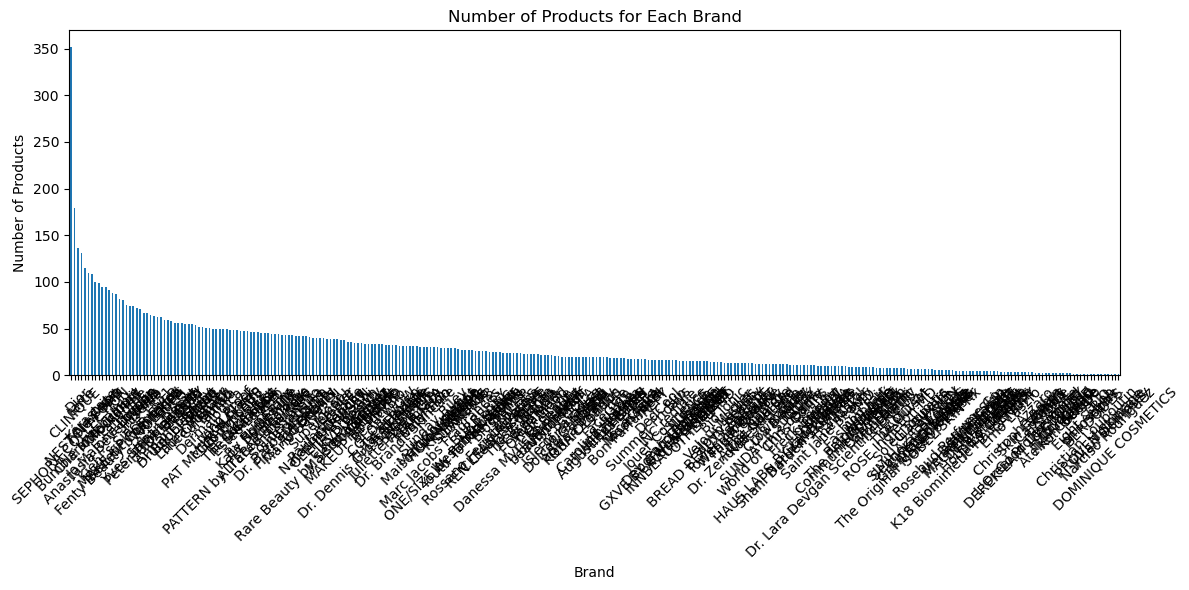

In [9]:
import matplotlib.pyplot as plt

# Count the number of products for each brand
brand_counts = product_info['brand_name'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Number of Products for Each Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

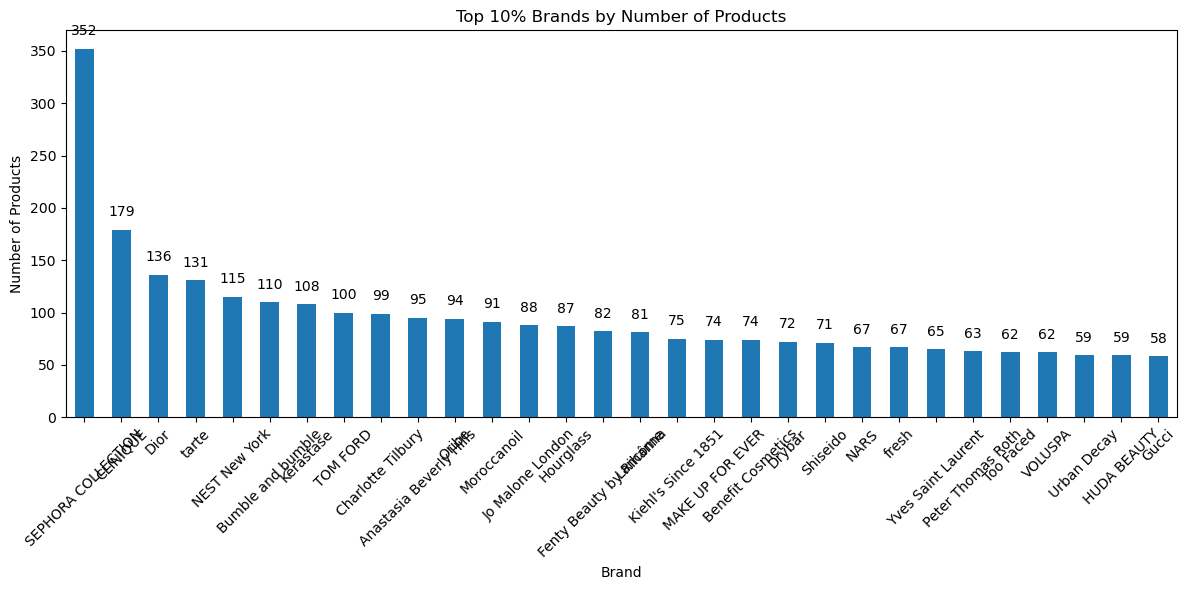

In [10]:
# Calculate the brand counts
brand_counts = product_info['brand_name'].value_counts()

# Calculate the threshold for the top 10% brands
brand_threshold = int(len(brand_counts) * 0.1)

# Select the top 10% brands based on the count
top_brands = brand_counts[:brand_threshold]

# Create a bar plot for the top brands
plt.figure(figsize=(12, 6))
ax = top_brands.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 10% Brands by Number of Products')
plt.xticks(rotation=45)

# Add text annotations to each bar
for i, v in enumerate(top_brands):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [11]:
top_brands

SEPHORA COLLECTION         352
CLINIQUE                   179
Dior                       136
tarte                      131
NEST New York              115
Bumble and bumble          110
Kérastase                  108
TOM FORD                   100
Charlotte Tilbury           99
Anastasia Beverly Hills     95
Oribe                       94
Moroccanoil                 91
Jo Malone London            88
Hourglass                   87
Fenty Beauty by Rihanna     82
Lancôme                     81
Kiehl's Since 1851          75
MAKE UP FOR EVER            74
Benefit Cosmetics           74
Drybar                      72
Shiseido                    71
NARS                        67
fresh                       67
Yves Saint Laurent          65
Peter Thomas Roth           63
Too Faced                   62
VOLUSPA                     62
Urban Decay                 59
HUDA BEAUTY                 59
Gucci                       58
Name: brand_name, dtype: int64

In [12]:
# Filter the DataFrame for products carried by Sephora Collection
sephora_collection_products = product_info[product_info['brand_name'] == 'SEPHORA COLLECTION']
sephora_collection_products['product_name'].head(30)

6434                      Cream Lip Stain Liquid Lipstick
6435                           Sephora Colorful Eyeshadow
6436                                 #LIPSTORIES Lipstick
6437                      Retractable Waterproof Eyeliner
6438                      12 Hour Contour Pencil Eyeliner
6439                        Cleansing & Exfoliating Wipes
6440    Sephora Colorful Waterproof Eyeshadow & Eyelin...
6441                                     Lip Balm & Scrub
6442                      Retractable Rouge Gel Lip Liner
6443                                Ultra Shine Lip Gloss
6444                                      Lip Liner To Go
6445                 Retractable Brow Pencil - Waterproof
6446                        Outrageous Plumping Lip Gloss
6447          Bright Future Gel Serum Under Eye Concealer
6448                      Sephora Colorful Lip Gloss Balm
6449                   10 Hour Wear Perfection Foundation
6450    Sephora Colorful Face Powders – Blush, Bronze,...
6451          

In [13]:
# Count the occurrences of each primary category
category_counts = product_info['primary_category'].value_counts()
category_counts

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

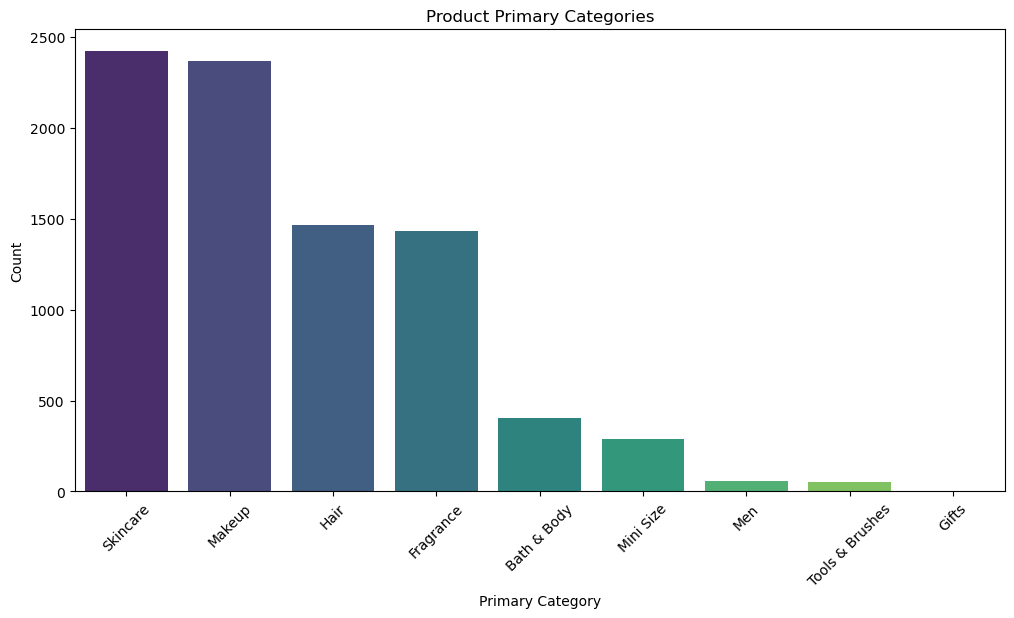

In [14]:
import matplotlib.pyplot as plt
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.title('Product Primary Categories')
plt.xticks(rotation=45)
plt.show()


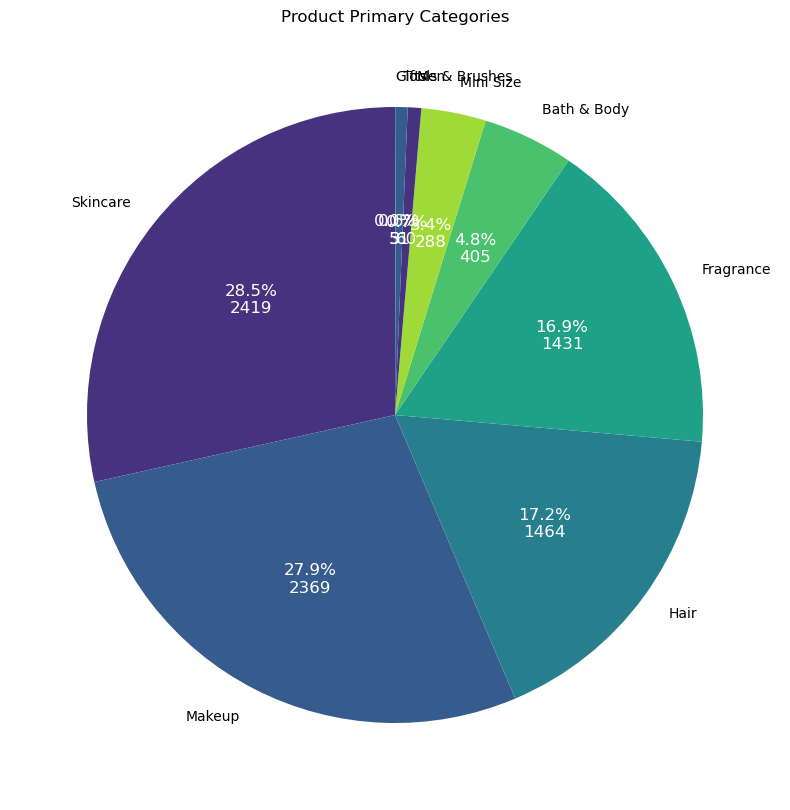

In [15]:
# Calculate the category counts
category_counts = product_info['primary_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(category_counts.values, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(category_counts.values))}", startangle=90, colors=sns.color_palette('viridis'))

# Add a title
plt.title('Product Primary Categories')

# Add count numbers
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(12)

# Display the pie chart
plt.show()

In [16]:
skincare_products = product_info[product_info['primary_category'] == 'Skincare']
skincare_products['product_name'].head(30)

89                  GENIUS Sleeping Collagen Moisturizer
90                          GENIUS Liquid Collagen Serum
91               Triple Algae Eye Renewal Balm Eye Cream
92                  GENIUS Liquid Collagen Lip Treatment
93     SUBLIME DEFENSE Ultra Lightweight UV Defense F...
94                      GENIUS Ultimate Anti-Aging Cream
95           GENIUS Ultimate Anti-Aging Melting Cleanser
96                          Gentle Rejuvenating Cleanser
97                                    10 Day Results Kit
98                     Advanced Anti-Aging Repairing Oil
99                           Overnight Restorative Cream
100          GENIUS Ultimate Anti-Aging Vitamin C+ Serum
101                  Regenerative Anti-Aging Moisturizer
102    Blue Algae Vitamin C Skinclarity Brightening S...
103                 POWER Recharging Night Pressed Serum
104                      Algae Niacinamide Moisture Veil
105          GENIUS Liquid Skin Resurfacing 2% BHA Toner
106                       GENIU

In [17]:
# Count the occurrences of each secondary category
secondary_category_counts = product_info['secondary_category'].value_counts()
secondary_category_counts

Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
High Tech Tools               80
Wellness                      79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                          52
Accessorie

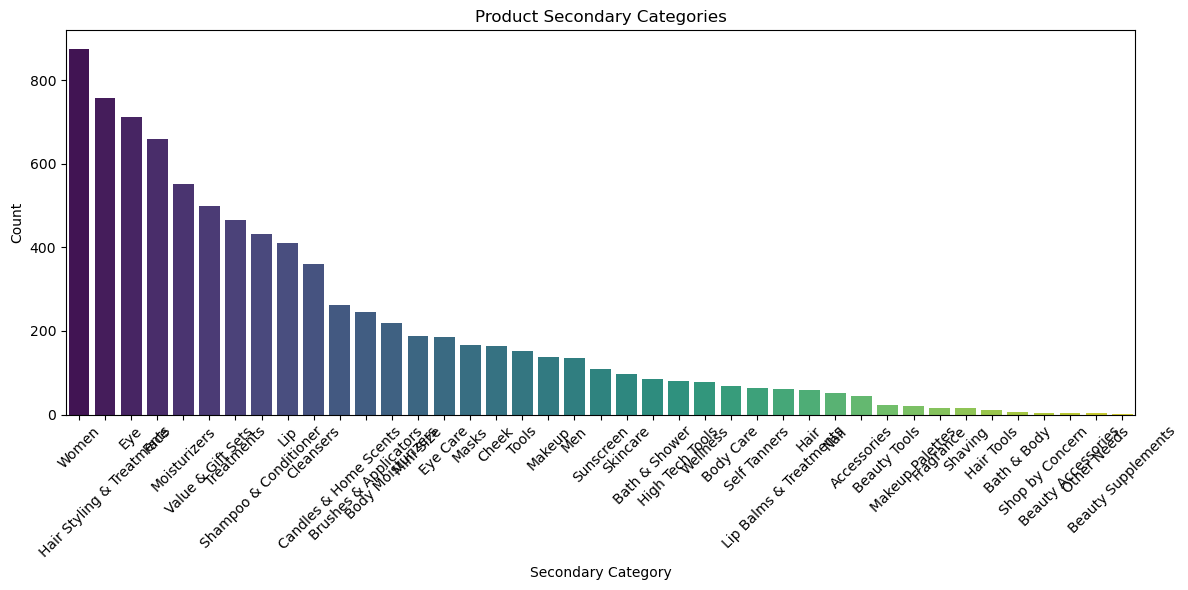

In [18]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')
plt.xlabel('Secondary Category')
plt.ylabel('Count')
plt.title('Product Secondary Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
sc_skincare_products = product_info[product_info['secondary_category'] == 'Women']
sc_skincare_products['product_name']

1                  La Habana Eau de Parfum
2                Rainbow Bar Eau de Parfum
3                     Kasbah Eau de Parfum
4                Purple Haze Eau de Parfum
5        Kasbah Eau de Parfum Travel Spray
                       ...                
8470                 Black Opium Le Parfum
8471                                 Opium
8474    Black Opium Le Parfum Travel Spray
8478       Mon Paris Couture Eau de Parfum
8479     Mon Paris Eau de Toilette Lumiere
Name: product_name, Length: 875, dtype: object

brand_id  loves_count    rating   reviews  price_usd  \
brand_id           1.000000    -0.035604 -0.052433 -0.070557  -0.066667   
loves_count       -0.035604     1.000000  0.041797  0.683786  -0.089607   
rating            -0.052433     0.041797  1.000000  0.069801   0.056738   
reviews           -0.070557     0.683786  0.069801  1.000000  -0.055304   
price_usd         -0.066667    -0.089607  0.056738 -0.055304   1.000000   
value_price_usd   -0.032419    -0.062963  0.105132  0.017110   0.950908   
sale_price_usd     0.204826    -0.102487  0.097451 -0.031161   0.953726   
limited_edition    0.004533    -0.069116 -0.050978 -0.081380   0.046343   
new                0.027141    -0.076058  0.102084 -0.054899   0.028793   
online_only        0.107290    -0.163905 -0.022032 -0.141340   0.091808   
out_of_stock      -0.081976    -0.053776 -0.046998 -0.063988  -0.022198   
sephora_exclusive  0.124417     0.040512  0.018961 -0.025970  -0.140527   
child_count       -0.096247     0.408203  0.003946  0.286604  -0.051893   
child_max_price   -0.199234    -0.104384  0.107003 -0.043836   0.771175   
child_min_price   -0.217974    -0.139251  0.109185 -0.123081   0.647940   

                   value_price_usd  sale_price_usd  limited_edition       new  \
brand_id                 -0.032419        0.204826         0.004533  0.027141   
loves_count              -0.062963       -0.102487        -0.069116 -0.076058   
rating                    0.105132        0.097451        -0.050978  0.102084   
reviews                   0.017110       -0.031161        -0.081380 -0.054899   
price_usd                 0.950908        0.953726         0.046343  0.028793   
value_price_usd           1.000000        0.881194         0.078578  0.155181   
sale_price_usd            0.881194        1.000000         0.153528       NaN   
limited_edition           0.078578        0.153528         1.000000  0.155662   
new                       0.155181             NaN         0.155662  1.000000   
online_only               0.082985        0.246329         0.061462  0.042553   
out_of_stock             -0.048401       -0.198436         0.162170  0.014177   
sephora_exclusive        -0.027303       -0.183794         0.066938  0.066984   
child_count              -0.060864       -0.066505        -0.062251 -0.003873   
child_max_price           0.927760        0.794241        -0.005318 -0.023746   
child_min_price           0.784437        0.649473        -0.003846  0.005099   

                   online_only  out_of_stock  sephora_exclusive  child_count  \
brand_id              0.107290     -0.081976           0.124417    -0.096247   
loves_count          -0.163905     -0.053776           0.040512     0.408203   
rating               -0.022032     -0.046998           0.018961     0.003946   
reviews              -0.141340     -0.063988          -0.025970     0.286604   
price_usd             0.091808     -0.022198          -0.140527    -0.051893   
value_price_usd       0.082985     -0.048401          -0.027303    -0.060864   
sale_price_usd        0.246329     -0.198436          -0.183794    -0.066505   
limited_edition       0.061462      0.162170           0.066938    -0.062251   
new                   0.042553      0.014177           0.066984    -0.003873   
online_only           1.000000      0.002011          -0.100806    -0.091615   
out_of_stock          0.002011      1.000000           0.025218    -0.053141   
sephora_exclusive    -0.100806      0.025218           1.000000     0.021568   
child_count          -0.091615     -0.053141           0.021568     1.000000   
child_max_price       0.040024     -0.037144          -0.241908    -0.105109   
child_min_price       0.069144     -0.036444          -0.216606    -0.095215   

                   child_max_price  child_min_price  
brand_id                 -0.199234        -0.217974  
loves_count              -0.104384        -0.139251  
rating                    0.107003         0.109185  
reviews                 

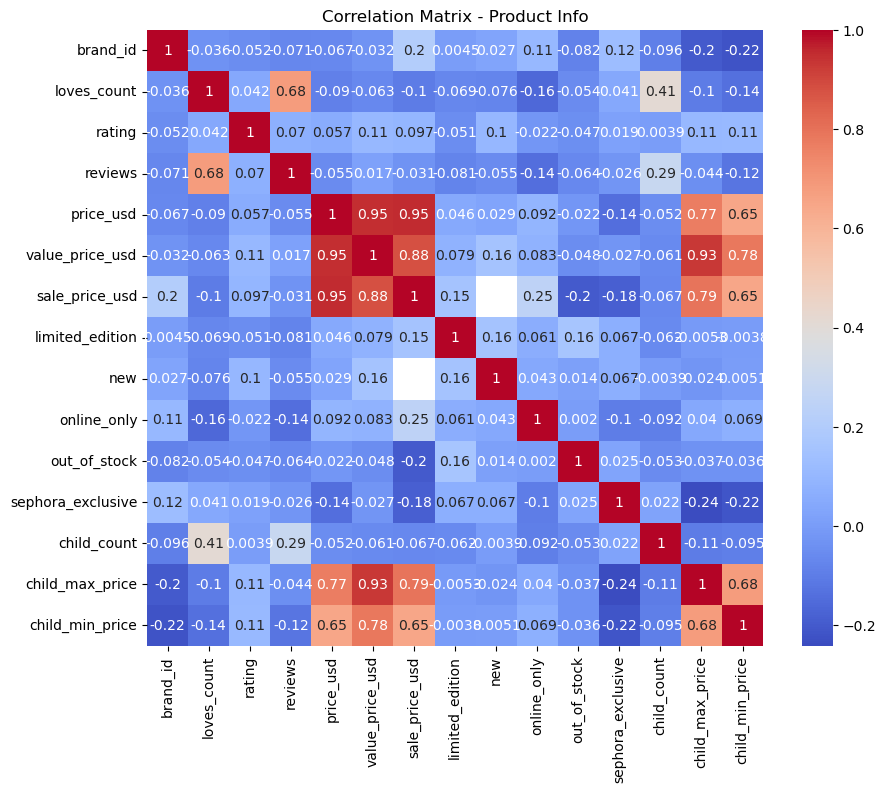

In [20]:
# Calculate the correlation matrix
correlation_matrix = product_info.corr()
display(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = product_info.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix - Product Info')
plt.show()


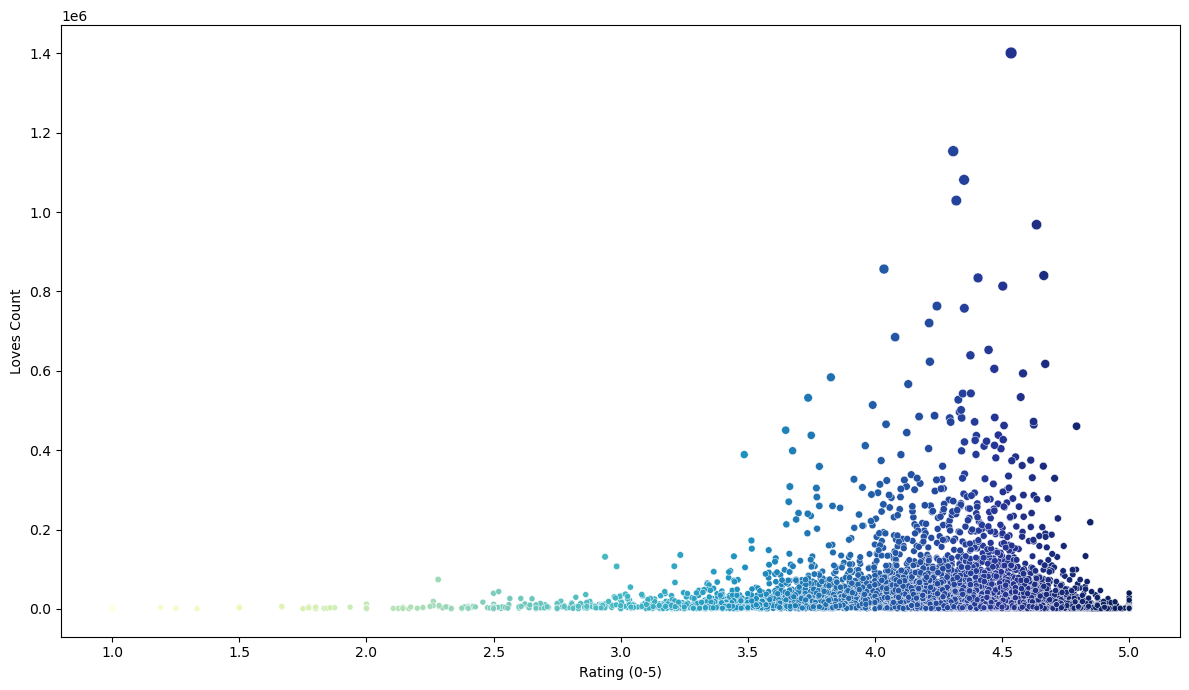

In [21]:
# relationship between rating and loves_count
plt.figure(figsize=(12, 7))
sns.scatterplot(x='rating', y='loves_count', data=product_info, size='loves_count', hue='rating', palette='YlGnBu', legend=False)
plt.xlabel('Rating (0-5)')
plt.ylabel('Loves Count')
plt.tight_layout()
plt.show()

In [22]:
correlation = product_info['loves_count'].corr(product_info['rating'])
print(f"Correlation between loves_count and rating: {correlation}")
# correlation

Correlation between loves_count and rating: 0.04179718344886663


In [23]:
max_loves_count = product_info['loves_count'].max()
max_loves_count_row = product_info.loc[product_info['loves_count'] == max_loves_count]
max_loves_count_row


product_id             product_name  brand_id  \
6242  P97989778  Soft Pinch Liquid Blush      6317   

                       brand_name  loves_count  rating  reviews  \
6242  Rare Beauty by Selena Gomez      1401068  4.5356   4733.0   

                 size variation_type variation_value  ... online_only  \
6242  0.25 oz/ 7.5 mL          Color         Believe  ...           0   

     out_of_stock  sephora_exclusive  \
6242            0                  1   

                                             highlights  primary_category  \
6242  ['Radiant Finish', 'Liquid Formula', 'Communit...            Makeup   

      secondary_category  tertiary_category  child_count  child_max_price  \
6242               Cheek              Blush           12             23.0   

      child_min_price  
6242             23.0  

[1 rows x 27 columns]

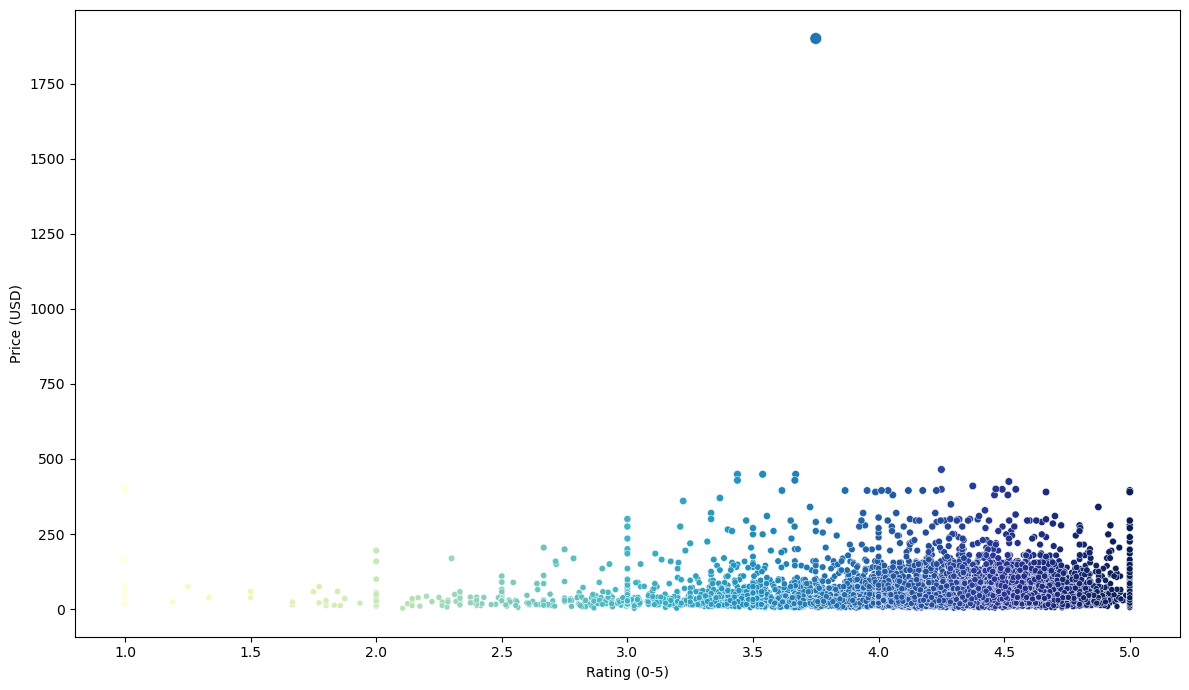

In [24]:
# relationship between rating and price_usd
plt.figure(figsize=(12, 7))
sns.scatterplot(x='rating', y='price_usd', data=product_info, size='price_usd', hue='rating', palette='YlGnBu', legend=False)
plt.xlabel('Rating (0-5)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

In [25]:
correlation = product_info['price_usd'].corr(product_info['rating'])
print(f"Correlation between price_usd and rating: {correlation}")
# correlation

Correlation between price_usd and rating: 0.056737839996533534


In [26]:
# OUTLIER SPOTTED
# Filter the DataFrame for products with price_usd greater than 1700
price_above_1700 = product_info[product_info['price_usd'] > 1700]
price_above_1700

product_id                               product_name  brand_id  \
6802    P502216  Shani Darden by Déesse PRO LED Light Mask      6314   

                  brand_name  loves_count  rating  reviews size  \
6802  Shani Darden Skin Care         4154    3.75      4.0  NaN   

     variation_type variation_value  ... online_only out_of_stock  \
6802            NaN             NaN  ...           1            0   

      sephora_exclusive                                         highlights  \
6802                  1  ['Good for: Loss of firmness', 'Good for: Anti...   

      primary_category  secondary_category  tertiary_category  child_count  \
6802          Skincare     High Tech Tools         Anti-Aging            0   

      child_max_price  child_min_price  
6802              NaN              NaN  

[1 rows x 27 columns]

In [29]:
# Search for product with ID "P502216" in the reviews dataset
product_reviews = reviews[reviews['product_id'] == 'P502216']
product_reviews

Unnamed: 0   author_id  rating  is_recommended  helpfulness  \
49611       49611  1885324769       1             0.0     1.000000   
49612       49612  1062321211       4             1.0     0.777778   
49613       49613  1486490323       5             1.0     0.700000   
49614       49614  1997394056       5             1.0     0.806452   

       total_feedback_count  total_neg_feedback_count  \
49611                     9                         0   
49612                    27                         6   
49613                    10                         3   
49614                    31                         6   

       total_pos_feedback_count submission_time  \
49611                         9      2023-02-25   
49612                        21      2023-01-28   
49613                         7      2023-01-21   
49614                        25      2023-01-17   

                                             review_text  \
49611  Bought this online and the remote isn’t workin...   
49612  I have been using this mask for two weeks and ...   
49613  Great for discoloration/ age spots. Must simpl...   
49614  This is so worth the money. This is a professi...   

                                           review_title    skin_tone  \
49611                                       Didn’t work          tan   
49612  Too soon to see results - will update in a month  lightMedium   
49613                             Definitely worth cost          NaN   
49614                                         Worth it!          NaN   

      eye_color    skin_type hair_color product_id  \
49611     brown          dry      black    P502216   
49612     hazel  combination      brown    P502216   
49613     hazel         oily     blonde    P502216   
49614       NaN          NaN        NaN    P502216   

                                    product_name              brand_name  \
49611  Shani Darden by Déesse PRO LED Light Mask  Shani Darden Skin Care   
49612  Shani Darden by Déesse PRO LED Light Mask  Shani Darden Skin Care   
49613  Shani Darden by Déesse PRO LED Light Mask  Shani Darden Skin Care   
49614  Shani Darden by Déesse PRO LED Light Mask  Shani Darden Skin Care   

       price_usd  
49611     1900.0  
49612     1900.0  
49613     1900.0  
49614     1900.0

In [30]:
# Calculate the threshold for top 10% of ratings and love counts
rating_threshold_top = product_info['rating'].quantile(0.9)
loves_count_threshold_top = product_info['loves_count'].quantile(0.9)

# Filter the DataFrame to select the top 10% of ratings and love counts
top_ratings_loves = product_info[(product_info['rating'] >= rating_threshold_top) & (product_info['loves_count'] >= loves_count_threshold_top)]

# Display the top rated and highly loved products
top_ratings_loves

product_id                                       product_name  brand_id  \
251     P409118              Modern Renaissance Eye Shadow Palette      5746   
260     P384059   Brush 12 Precision Brow Brush for Pomades & Gels      5746   
537     P447375              Cookie and Tickle Powder Highlighters      5333   
4622    P468384            Higher Standard Satin Matte Cream Blush      6345   
5623    P482709                Cheek Clapper 3D Blush Trio Palette      6326   
5876    P472489                   Skin Fetish: Divine Powder Blush      6160   
5922    P458747  Major Beauty Headlines - Double-Take Crème & P...      6286   
6457    P389120            Solid Brush and Sponge Cleaner with Pad      3902   
6458    P313020                            PRO Concealer Brush #57      3902   
6468    P472069                            Silicone Scalp Massager      3902   
6469    P417913                            PRO Concealer Brush #71      3902   
6472    P420016                               PRO Powder Brush #50      3902   
6805    P173726                                      Facial Cotton      5337   

                      brand_name  loves_count  rating  reviews  \
251      Anastasia Beverly Hills       460449  4.7931   9133.0   
260      Anastasia Beverly Hills       158547  4.7427   1551.0   
537            Benefit Cosmetics        87043  4.7399    273.0   
4622                  LYS Beauty        82865  4.7471    340.0   
5623  ONE/SIZE by Patrick Starrr        95820  4.7403    335.0   
5876            PAT McGRATH LABS        86644  4.7783    672.0   
5922                  PATRICK TA       218384  4.8471   1452.0   
6457          SEPHORA COLLECTION        99333  4.7919   2182.0   
6458          SEPHORA COLLECTION        98631  4.7776   1043.0   
6468          SEPHORA COLLECTION        73770  4.8072    363.0   
6469          SEPHORA COLLECTION        73207  4.7657    303.0   
6472          SEPHORA COLLECTION        68791  4.8346    405.0   
6805                    Shiseido       133163  4.8284   2827.0   

                                                   size variation_type  \
251                                                 NaN            NaN   
260                                                 NaN            NaN   
537                                       0.28 oz / 8 g          Color   
4622                                     0.23 oz/ 6.5 g          Color   
5623                                                NaN          Color   
5876                                     0.34 oz/ 9.7 g          Color   
5922  0.21 oz crème and 0.14 oz powder / 6 g crème a...          Color   
6457                                                NaN           Size   
6458                                                NaN            NaN   
6468                                                NaN            NaN   
6469                                                NaN            NaN   
6472                                                NaN            NaN   
6805                                         165 sheets           Size   

       variation_value  ... online_only out_of_stock  sephora_exclusive  \
251                NaN  ...           0            0                  0   
260                NaN  ...           0            0                  0   
537             Cookie  ...           0            0                  0   
4622           Inspire  ...           1            0                  1   
5623  Attention Seeker  ...           0            0                  0   
5876    Paradise Venus  ...           0            0                  1   
5922   She's That Girl  ...           0            0                  1   
6457               NaN  ...           0            0                  1   
6458               NaN  ...           0            0                  1   
6468               NaN  ...           0            1                  1   
6469               NaN  ...           0            0                  1   
6472               NaN

In [31]:
# Calculate the threshold for last 10% of ratings and love counts
rating_threshold_last =product_info['rating'].quantile(0.1)
loves_count_threshold_last = product_info['loves_count'].quantile(0.1)

# Filter the DataFrame to select the last 10% of ratings and love counts
last_ratings_loves = product_info[(product_info['rating'] <= rating_threshold_last) & (product_info['loves_count'] <= loves_count_threshold_last)]
last_ratings_loves

product_id                                       product_name  brand_id  \
12      P473664                         L'air Barbes Eau de Parfum      6342   
13      P473665            L'air Barbes Eau de Parfum Travel Spray      6342   
40      P380571                     Colonia Alcohol-Free Deodorant      5847   
45      P448828                           Luce di Colonia Diffuser      5847   
85      P475042                         Cedar Violet Eau de Parfum      7054   
...         ...                                                ...       ...   
8262    P471110                    Mini Hair & Scalp Treatment Duo      6304   
8265    P455853              Mini Healthy Hair Refresh Dry Shampoo      6304   
8266    P455855  Mini Smooth Conditioner for Coarse & Textured ...      6304   
8327    P477455                           Mini Decorative Tin Trio      6245   
8328    P474132                Forbidden Fig Decorative Tin Candle      6245   

          brand_name  loves_count  rating  reviews             size  \
12             19-69          981  3.0000      4.0   3.4 oz/ 100 mL   
13             19-69          721  3.0000      4.0  0.25 oz/ 7.5 mL   
40    Acqua di Parma         1023  3.2000     10.0    2.5 oz/ 75 mL   
45    Acqua di Parma          349  2.6667      3.0     6 oz/ 180 mL   
85             AERIN         1258  3.3571     14.0    1.7 oz/ 50 mL   
...              ...          ...     ...      ...              ...   
8262          Virtue         1233  2.0000      4.0              NaN   
8265          Virtue          888  1.0000      2.0      1.8 oz/51 g   
8266          Virtue          860  3.0000      2.0      2 oz/ 60 mL   
8327         VOLUSPA         1048  2.5000      2.0              NaN   
8328         VOLUSPA          819  3.0000      5.0     12 oz/ 340 g   

                          variation_type                     variation_value  \
12    Size + Concentration + Formulation  3.4 oz/ 100 mL Eau de Parfum Spray   
13    Size + Concentration + Formulation                     0.25 oz/ 7.5 mL   
40                                  Size                       2.5 oz/ 75 mL   
45                                   NaN                                 NaN   
85    Size + Concentration + Formulation   1.7 oz/ 50 mL Eau de Parfum Spray   
...                                  ...                                 ...   
8262                                 NaN                                 NaN   
8265                                Size                         1.8 oz/51 g   
8266                                Size                         2 oz/ 60 mL   
8327                                 NaN                                 NaN   
8328  Size + Concentration + Formulation                        12 oz/ 340 g   

      ... online_only out_of_stock  sephora_exclusive  \
12    ...           1            0                  0   
13    ...           1            0                  0   
40    ...           1            0                  0   
45    ...           1            0                  0   
85    ...           1            0                  0   
...   ...         ...          ...                ...   
8262  ...           1            0                  0   
8265  ...           1            0                  0   
8266  ...           1            0                  0   
8327  ...           0            1                  1   
8328  ...           1            0                  0   

                                             highlights  primary_category  \
12    ['Fresh Scent', 'Unisex/ Genderless Scent', 'L...         Fragrance   
13    ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
40     ['Stick Formula', 'Fresh Scent', 'Alcohol Free']       Bath & Body   
45                                                  NaN         Fragrance   
85                                                  NaN         Fragrance   
...                                                 ...               ...   
8262  

In [32]:
# Sort the DataFrame by rating in ascending order
sorted_by_rating = product_info.sort_values(by='rating', ascending=True)

# Calculate the threshold for top 10% of ratings
rating_threshold_top = sorted_by_rating['rating'].quantile(0.9)

# Filter the DataFrame to select the top 10% of ratings
top_ratings = sorted_by_rating[sorted_by_rating['rating'] >= rating_threshold_top].copy()

# Sort the top_ratings DataFrame by loves_count in ascending order
sorted_by_loves_count = top_ratings.sort_values(by='loves_count', ascending=True)

# Calculate the threshold for top 10% of loves_count
loves_count_threshold_top = sorted_by_loves_count['loves_count'].quantile(0.9)

# Filter the DataFrame to select the top 10% of loves_count
top_loves_count = sorted_by_loves_count[sorted_by_loves_count['loves_count'] >= loves_count_threshold_top].copy()

# Print the top_loves_count DataFrame
top_loves_count


product_id                                       product_name  brand_id  \
1255    P434008                                  Eye Smudger Brush      6236   
6561    P482301                       Total Coverage Angled Sponge      3902   
2036    P186402              Light Blue Pour Homme Eau de Toilette      3673   
6417    P480189                    The Fluffy Setting Powder Brush      6337   
2508    P480165                           Healthy Skin Starter Kit      8001   
...         ...                                                ...       ...   
6457    P389120            Solid Brush and Sponge Cleaner with Pad      3902   
6805    P173726                                      Facial Cotton      5337   
260     P384059   Brush 12 Precision Brow Brush for Pomades & Gels      5746   
5922    P458747  Major Beauty Headlines - Double-Take Crème & P...      6286   
251     P409118              Modern Renaissance Eye Shadow Palette      5746   

                   brand_name  loves_count  rating  reviews  \
1255        Charlotte Tilbury        18974  4.8824     34.0   
6561       SEPHORA COLLECTION        19045  4.8994    159.0   
2036            Dolce&Gabbana        19367  4.7358    424.0   
6417                     Saie        19428  4.7800    200.0   
2508                  Farmacy        20010  4.7653     98.0   
...                       ...          ...     ...      ...   
6457       SEPHORA COLLECTION        99333  4.7919   2182.0   
6805                 Shiseido       133163  4.8284   2827.0   
260   Anastasia Beverly Hills       158547  4.7427   1551.0   
5922               PATRICK TA       218384  4.8471   1452.0   
251   Anastasia Beverly Hills       460449  4.7931   9133.0   

                                                   size  \
1255                                                NaN   
6561                                                NaN   
2036                                     4.2 oz/ 125 mL   
6417                                                NaN   
2508                                                NaN   
...                                                 ...   
6457                                                NaN   
6805                                         165 sheets   
260                                                 NaN   
5922  0.21 oz crème and 0.14 oz powder / 6 g crème a...   
251                                                 NaN   

                          variation_type  \
1255                                 NaN   
6561                                 NaN   
2036  Size + Concentration + Formulation   
6417                                 NaN   
2508                                 NaN   
...                                  ...   
6457                                Size   
6805                                Size   
260                                  NaN   
5922                               Color   
251                                  NaN   

                           variation_value  ... online_only out_of_stock  \
1255                                   NaN  ...           0            0   
6561                                   NaN  ...           0            0   
2036  4.2 oz/ 125 mL Eau de Toilette Spray  ...           0            0   
6417                                   NaN  ...           0            0   
2508                                   NaN  ...           0            0   
...                                    ...  ...         ...          ...   
6457                                   NaN  ...           0            0   
6805                            165 sheets  ...           0            0   
260                                    NaN  ...           0            0   
5922                       She's That Girl  ...           0            0   
251                                    NaN  ...           0            0   

      sephora_exclusive                                         highlights  \
1255                  0                                   

In [33]:
# Sort the DataFrame by rating in ascending order
sorted_by_rating = product_info.sort_values(by='rating', ascending=True)

# Calculate the threshold for last bottom 10% of ratings
rating_threshold_bottom = sorted_by_rating['rating'].quantile(0.1)

# Filter the DataFrame to select the last bottom 10% of ratings
bottom_ratings = sorted_by_rating[sorted_by_rating['rating'] <= rating_threshold_bottom].copy()

# Sort the bottom_ratings DataFrame by loves_count in ascending order
sorted_by_loves_count = bottom_ratings.sort_values(by='loves_count', ascending=True)

# Calculate the threshold for last bottom 10% of loves_count
loves_count_threshold_bottom = sorted_by_loves_count['loves_count'].quantile(0.1)

# Filter the DataFrame to select the last bottom 10% of loves_count
bottom_loves_count = sorted_by_loves_count[sorted_by_loves_count['loves_count'] <= loves_count_threshold_bottom].copy()

# Print the bottom_loves_count DataFrame
bottom_loves_count

product_id                                       product_name  brand_id  \
5496    P441634                      Rose Noir & Oud Votive Candle      7025   
2022    P440922  Capture Youth Intense Rescue Age-Delay Revital...      1073   
6703    P446820          Grapefruit Peeling Mask - Skin Perfection      3902   
3383    P478522   Mini GloWish Soft Radiance Vegan Bronzing Powder      6106   
5031    P504224                 True Textures Twist and Coil Jelly      6315   
...         ...                                                ...       ...   
1198    P447142                  Bleu de Chanel 2 in 1 Moisturizer      1065   
40      P380571                     Colonia Alcohol-Free Deodorant      5847   
3004    P502388                        GOOPGLOW Afterglow Body Oil      6309   
1197    P479695                  BLEU DE CHANEL After Shave Lotion      1065   
87      P471527           Rose De Grasse Pour Filles Eau de Parfum      7054   

              brand_name  loves_count  rating  reviews           size  \
5496       NEST New York            0  3.3333      3.0        2oz/57g   
2022                Dior            0  3.4000      5.0    1 oz/ 30 mL   
6703  SEPHORA COLLECTION            0  3.4444     36.0  1.69oz/ 50 mL   
3383         HUDA BEAUTY            0  3.4583     24.0            NaN   
5031              Mizani          145  3.5000      6.0  8 oz / 250 mL   
...                  ...          ...     ...      ...            ...   
1198              CHANEL         1017  3.0000      2.0    1.7 oz/50mL   
40        Acqua di Parma         1023  3.2000     10.0  2.5 oz/ 75 mL   
3004                goop         1038  3.0000      3.0  4 oz / 120 mL   
1197              CHANEL         1040  1.0000      1.0         3.4 oz   
87                 AERIN         1042  2.0000      1.0    1 oz/ 30 mL   

                          variation_type  \
5496  Size + Concentration + Formulation   
2022                                Type   
6703                                Type   
3383                               Color   
5031                                Size   
...                                  ...   
1198                                Size   
40                                  Size   
3004                                Size   
1197  Size + Concentration + Formulation   
87    Size + Concentration + Formulation   

                                        variation_value  ... online_only  \
5496                                            2oz/57g  ...           1   
2022  Capture Youth Intense Rescue Age-Delay Revital...  ...           0   
6703                                 Grapefruit Peeling  ...           0   
3383                                             Medium  ...           0   
5031                                      8 oz / 250 mL  ...           0   
...                                                 ...  ...         ...   
1198                                        1.7 oz/50mL  ...           1   
40                                        2.5 oz/ 75 mL  ...           1   
3004                                      4 oz / 120 mL  ...           1   
1197                          3.4 oz After Shave Lotion  ...           0   
87                      1 oz/ 30 mL Eau de Parfum Spray  ...           1   

     out_of_stock  sephora_exclusive  \
5496            0                  0   
2022            0                  0   
6703            0                  1   
3383            0                  1   
5031            0                  0   
...           ...                ...   
1198            0                  0   
40              0                  0   
3004            0                  0   
1197            0                  0   
87              0                  0   

                                             highlights  primary_category  \
5496                                                NaN         Fragrance   
2022  ['Best for Oily Skin', 'Good for: Pores', 'Lac...          Skincare   
6703         

# Reviews

In [34]:
# import all reviews
reviews_1 = pd.read_csv("reviews_0_250.csv")
reviews_2 = pd.read_csv("reviews_250_500.csv")
reviews_3 = pd.read_csv("reviews_500_750.csv")
reviews_4 = pd.read_csv("reviews_750_1000.csv")
reviews_5 = pd.read_csv("reviews_1000_1500.csv")
reviews_6 = pd.read_csv("reviews_1500_end.csv")
# concat all reviews
reviews = pd.concat([reviews_1, reviews_2, reviews_3, reviews_4, reviews_5, reviews_6], axis=0)
reviews

C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\3853783607.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_1 = pd.read_csv("reviews_0_250.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\3853783607.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_5 = pd.read_csv("reviews_1000_1500.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\3853783607.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_6 = pd.read_csv("reviews_1500_end.csv")


Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0               0   1741593524       5             1.0          1.0   
1               1  31423088263       1             0.0          NaN   
2               2   5061282401       5             1.0          NaN   
3               3   6083038851       5             1.0          NaN   
4               4  47056667835       5             1.0          NaN   
...           ...          ...     ...             ...          ...   
49972       49972   2276253200       5             1.0          NaN   
49973       49973  28013163278       5             1.0          NaN   
49974       49974   1539813076       5             1.0          NaN   
49975       49975   5595682861       5             1.0          NaN   
49976       49976  27666075558       5             1.0          NaN   

       total_feedback_count  total_neg_feedback_count  \
0                         2                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
49972                     0                         0   
49973                     0                         0   
49974                     0                         0   
49975                     0                         0   
49976                     0                         0   

       total_pos_feedback_count submission_time  \
0                             2      2023-02-01   
1                             0      2023-03-21   
2                             0      2023-03-21   
3                             0      2023-03-20   
4                             0      2023-03-20   
...                         ...             ...   
49972                         0      2023-03-13   
49973                         0      2023-03-13   
49974                         0      2023-03-13   
49975                         0      2023-03-13   
49976                         0      2023-03-13   

                                             review_text  \
0      I use this with the Nudestix “Citrus Clean Bal...   
1      I bought this lip mask after reading the revie...   
2      My review title says it all! I get so excited ...   
3      I’ve always loved this formula for a long time...   
4      If you have dry cracked lips, this is a must h...   
...                                                  ...   
49972  Consider salicylic acid your secret weapon for...   
49973  I’ve been using this as my only moisturizer fo...   
49974  I got breakouts whenever it’s my time of month...   
49975  I love this!!! I don’t get actual acne just an...   
49976  I have never tried anything from StriVectin bu...   

                           review_title skin_tone eye_color    skin_type  \
0      Taught me how to double cleanse!       NaN     brown          dry   
1                          Disappointed       NaN       NaN          NaN   
2                  New Favorite Routine     light     brown          dry   
3       Can't go wrong with any of them       NaN     brown  combination   
4                       A must have !!!     light     hazel  combination   
...                                 ...       ...       ...          ...   
49972                               NaN      fair     brown  combination   
49973                               NaN       NaN      blue  combination   
49974                               NaN     light      blue  combination   
49975                               NaN      fair     hazel         oily   
49976                   Amazing Product     light     green       normal   

      hair_color product_id  \
0          black    P504322   
1            NaN    P420652   
2         blonde    P420652   
3          black    P420652   
4            NaN    P420652   
...          ...        ...   
49972

In [35]:
reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [36]:
import pandas as pd

# Search for NaN values in the reviews DataFrame
nan_values = reviews.isna().sum()

# Print the columns with NaN values and their respective counts
print(nan_values[nan_values > 0])


is_recommended    193974
helpfulness       669466
review_text         1616
review_title      370382
skin_tone         197338
eye_color         243402
skin_type         128306
hair_color        263312
dtype: int64


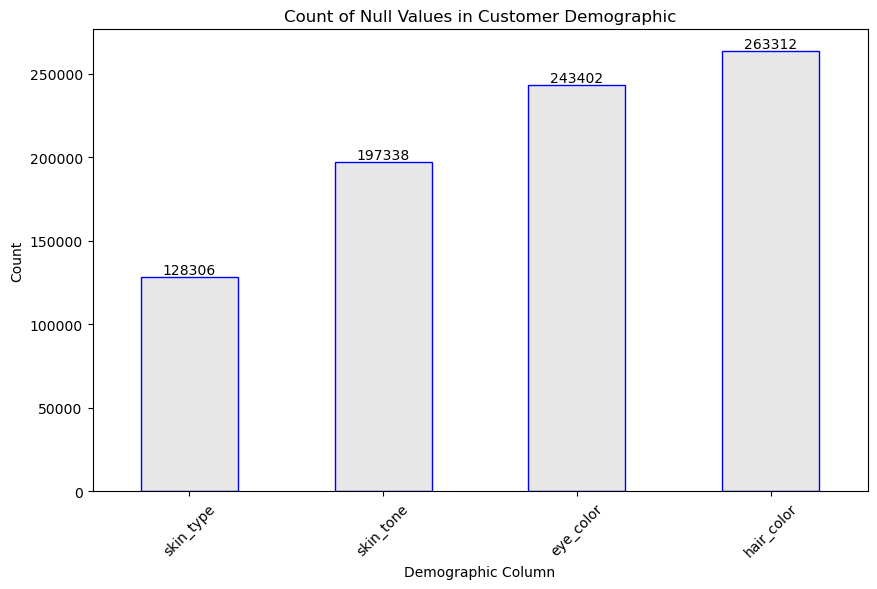

In [38]:
null_counts = reviews[['skin_type', 'skin_tone', 'eye_color', 'hair_color']].isnull().sum()
null_counts
plt.figure(figsize=(10, 6))
bar_plot = null_counts.plot(kind='bar', color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')
plt.title('Count of Null Values in Customer Demographic')
plt.xlabel('Demographic Column')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [39]:
first_time_buyers = reviews.groupby('author_id').size().reset_index(name='count')
first_time_buyers = first_time_buyers[first_time_buyers['count'] == 1]
num_first_time_buyers = len(first_time_buyers)
first_time_buyers
print("Number of unique first-time buyers:", num_first_time_buyers)


Number of unique first-time buyers: 310600


In [40]:
recommendation_counts = reviews['is_recommended'].value_counts()
print(recommendation_counts)


1.0    929476
0.0    177686
Name: is_recommended, dtype: int64


In [41]:
nan_count = reviews['is_recommended'].isna().sum()
nan_rows = reviews[reviews['is_recommended'].isna()]
nan_rows

Unnamed: 0   author_id  rating  is_recommended  helpfulness  \
15900       15900  1296660394       4             NaN          NaN   
15901       15901  1086759071       5             NaN     0.896552   
15902       15902  2433933866       5             NaN          NaN   
15903       15903  5944955520       5             NaN          NaN   
15904       15904  1043341645       3             NaN          NaN   
...           ...         ...     ...             ...          ...   
49361       49361  9178607273       5             NaN     0.925926   
49663       49663  2827563792       4             NaN     0.500000   
49664       49664     2760276       3             NaN     0.911111   
49810       49810  1885067735       5             NaN     0.952381   
49811       49811  5569250800       1             NaN     0.265625   

       total_feedback_count  total_neg_feedback_count  \
15900                     0                         0   
15901                   174                        18   
15902                     0                         0   
15903                     0                         0   
15904                     0                         0   
...                     ...                       ...   
49361                    27                         2   
49663                     6                         3   
49664                    45                         4   
49810                    21                         1   
49811                    64                        47   

       total_pos_feedback_count submission_time  \
15900                         0      2017-08-23   
15901                       156      2017-08-22   
15902                         0      2017-08-22   
15903                         0      2017-08-21   
15904                         0      2017-08-21   
...                         ...             ...   
49361                        25      2017-06-28   
49663                         3      2017-06-14   
49664                        41      2017-02-07   
49810                        20      2017-03-03   
49811                        17      2016-08-16   

                                             review_text  \
15900  Not the most moisturizing mask I have tried. T...   
15901  This stuff is a miracle worker. I love lipstic...   
15902  This is a game changer. I have tried other ove...   
15903  Oh my lanta. There are no words to describe ho...   
15904  While this stuff feels great on your lips and ...   
...                                                  ...   
49361  this worked wonders on my cracked skin after a...   
49663  It definitely helps to smooth out lines in you...   
49664  I only bought 1 mask to try it out because any...   
49810  I haven been using Clinique for 15 years and h...   
49811  This cream sat on the top of my skin (didn’t s...   

                         review_title skin_tone eye_color    skin_type  \
15900            love the taste/scent       NaN       NaN          NaN   
15901      I can wear lipstick again!       NaN       NaN          NaN   
15902                     HG for life       NaN       NaN          NaN   
15903  My Lips Have Never Been Softer       NaN       NaN          NaN   
15904              Good but not great       NaN       NaN          NaN   
...                               ...       ...       ...          ...   
49361                        amazing!       NaN       NaN          NaN   
49663              good but not great       NaN       NaN          NaN   
49664                OK temporary fix       NaN       NaN          NaN   
49810         Great Daily Moisturizer       NaN       NaN          NaN   
49811               Awful night cream       NaN       NaN  combination   

      hair_color product_id  \
15900        NaN    P420652   
15901        NaN    P420652   
15902        NaN    P420652   
15903        NaN    P420652   
15904        NaN    P420652   
...          ...        ...   
49361        NaN    P405285   
49663     

In [42]:
grouped = reviews.groupby('product_id')['is_recommended'].value_counts(dropna=False)
grouped.head(30)

product_id  is_recommended
P107306     NaN                174
            1.0                 56
            0.0                 23
P114902     NaN               1156
            1.0                325
            0.0                 48
P12045      1.0                884
            NaN                673
            0.0                130
P122651     NaN                162
            1.0                 33
            0.0                  5
P122661     NaN               1442
            1.0                142
            0.0                 36
P122718     NaN                938
            1.0                211
            0.0                 46
P122727     NaN                242
            1.0                 32
            0.0                  8
P122762     NaN               1374
            1.0                202
            0.0                 66
P122767     NaN                156
            1.0                  7
            0.0                  6
P122774     NaN             

In [43]:
grouped = reviews.groupby('product_name')['is_recommended'].value_counts(dropna=False)

# Iterate over each product ID
for product_id, values in grouped.groupby(level='product_name'):
    non_null_values = values.dropna()
    if not non_null_values.empty:
        max_value = non_null_values.idxmax()
        highest_value = non_null_values[max_value]

        # Print the highest non-null value and its count
        print("Product Name:", product_id)
        print(max_value, highest_value)

Product Name: "B" Oil
('"B" Oil', 1.0) 201
Product Name: "Buffet" + Copper Peptides 1%
('"Buffet" + Copper Peptides 1%', 1.0) 204
Product Name: (Glow)Setting 100% Mineral Powder SPF 35
('(Glow)Setting 100% Mineral Powder SPF 35', 1.0) 130
Product Name: (Re) Setting Refreshing Mist SPF 40
('(Re) Setting Refreshing Mist SPF 40', 1.0) 266
Product Name: (Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++
('(Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++', 1.0) 295
Product Name: +Retinol Vita C Power Serum
('+Retinol Vita C Power Serum', 1.0) 82
Product Name: +Retinol Vitamin C Moisturizer
('+Retinol Vitamin C Moisturizer', 1.0) 153
Product Name: 1 Minute Face Masks
('1 Minute Face Masks', 1.0) 78
Product Name: 1% Vitamin A Retinol Serum
('1% Vitamin A Retinol Serum', 1.0) 441
Product Name: 10 + 10 Moisturizer with 10% Vitamin C + 10% Peptide Complex + Ceramides
('10 + 10 Moisturizer with 10% Vitamin C + 10% Peptide Complex + Ceramides', 1.0) 268
Product Name: 10 Day Results Kit
(

Product Name: GloPRO Cryo Skin Icing Attachments
('GloPRO Cryo Skin Icing Attachments', 1.0) 9
Product Name: GloPRO EYE MicroTip Attachment Head
('GloPRO EYE MicroTip Attachment Head', 0.0) 5
Product Name: GloPRO FACE MicroTip Attachment Head
('GloPRO FACE MicroTip Attachment Head', 1.0) 6
Product Name: GloPRO Prep Pads Clarifying Skin Cleansing Wipes with Peptides
('GloPRO Prep Pads Clarifying Skin Cleansing Wipes with Peptides', 1.0) 12
Product Name: GloPRO SCALP MicroTip Attachment Head
('GloPRO SCALP MicroTip Attachment Head', 1.0) 10
Product Name: Glow + Get It Cooling & Brightening Eye Balm
('Glow + Get It Cooling & Brightening Eye Balm', 1.0) 263
Product Name: Glow Addict Activated Mask
('Glow Addict Activated Mask', 1.0) 9
Product Name: Glow Clear, Color Correcting Self-Tanning Mousse
('Glow Clear, Color Correcting Self-Tanning Mousse', 1.0) 244
Product Name: Glow Cycle Retin-ALT Power Serum
('Glow Cycle Retin-ALT Power Serum', 1.0) 1080
Product Name: Glow Daily Vitamin C Gel C

Product Name: Resurfacing Saffron AHA Masque - Radiant Rani
('Resurfacing Saffron AHA Masque - Radiant Rani', 1.0) 168
Product Name: Resveratrol 3% + Ferulic Acid 3%
('Resveratrol 3% + Ferulic Acid 3%', 1.0) 123
Product Name: Resveratrol Lift Firming Eye Gel-Cream
('Resveratrol Lift Firming Eye Gel-Cream', 1.0) 145
Product Name: Resveratrol Lift Instant Firming Retinol Alternative Serum
('Resveratrol Lift Instant Firming Retinol Alternative Serum', 1.0) 330
Product Name: Resveratrol Lift Retinol Alternative Firming Cashmere Moisturizer
('Resveratrol Lift Retinol Alternative Firming Cashmere Moisturizer', 1.0) 313
Product Name: Resveratrol Lift Retinol Alternative Firming Night Moisturizer
('Resveratrol Lift Retinol Alternative Firming Night Moisturizer', 1.0) 153
Product Name: Resveratrol-Lift Ultimate Firming Set
('Resveratrol-Lift Ultimate Firming Set', 1.0) 4
Product Name: Retexturizing Retinol Booster Serum
('Retexturizing Retinol Booster Serum', 1.0) 17
Product Name: Retinal + Nia

C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\1077891031.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


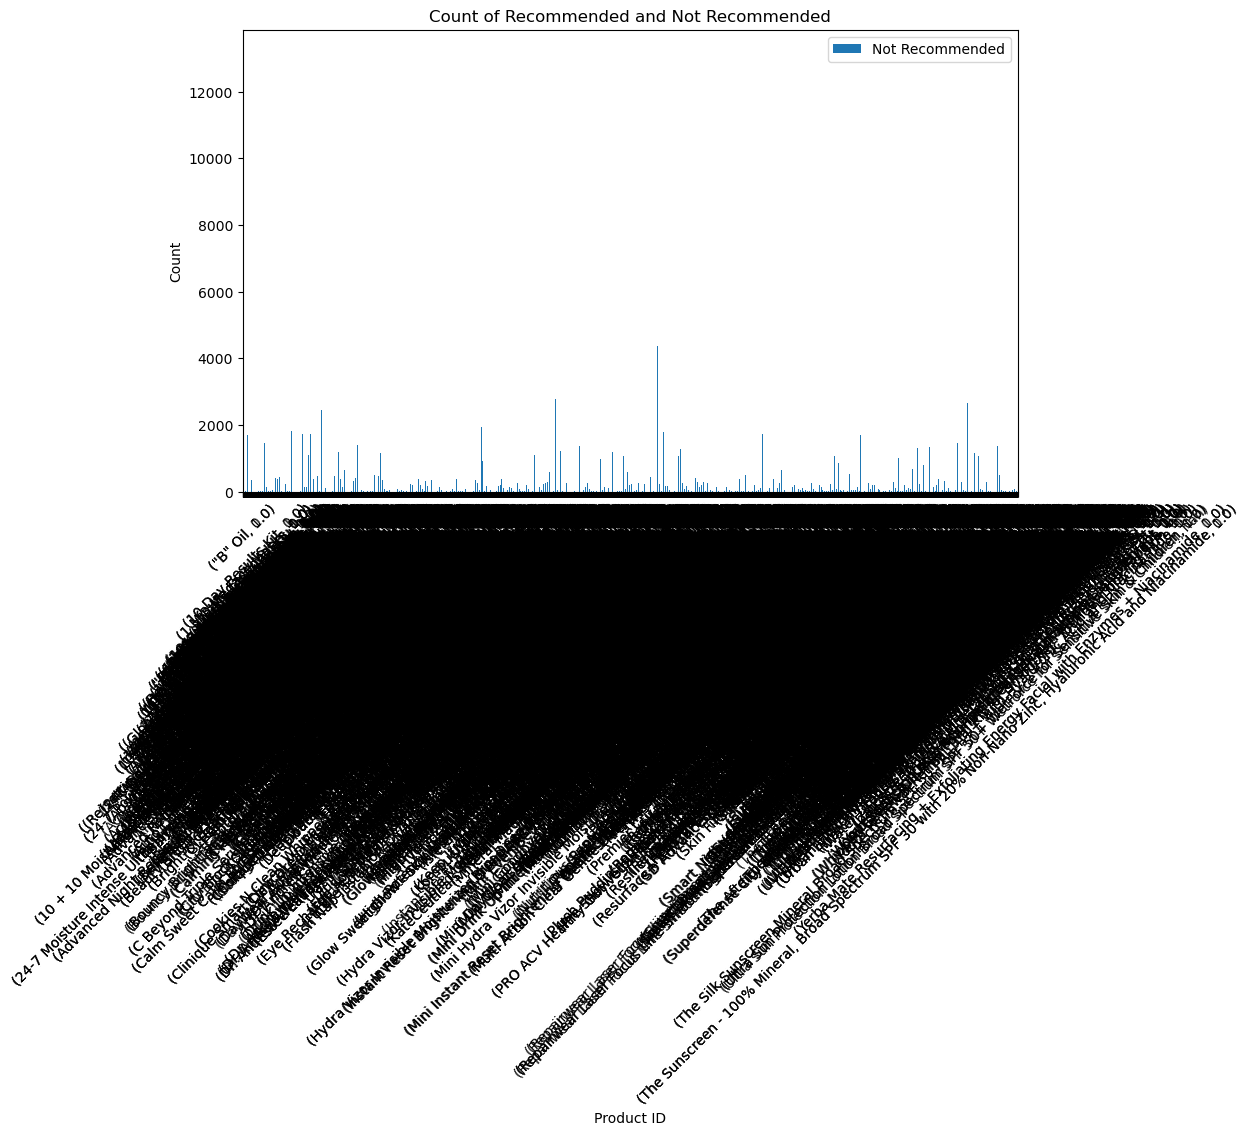

In [44]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Count of Recommended and Not Recommended')
plt.legend(['Not Recommended', 'Recommended'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

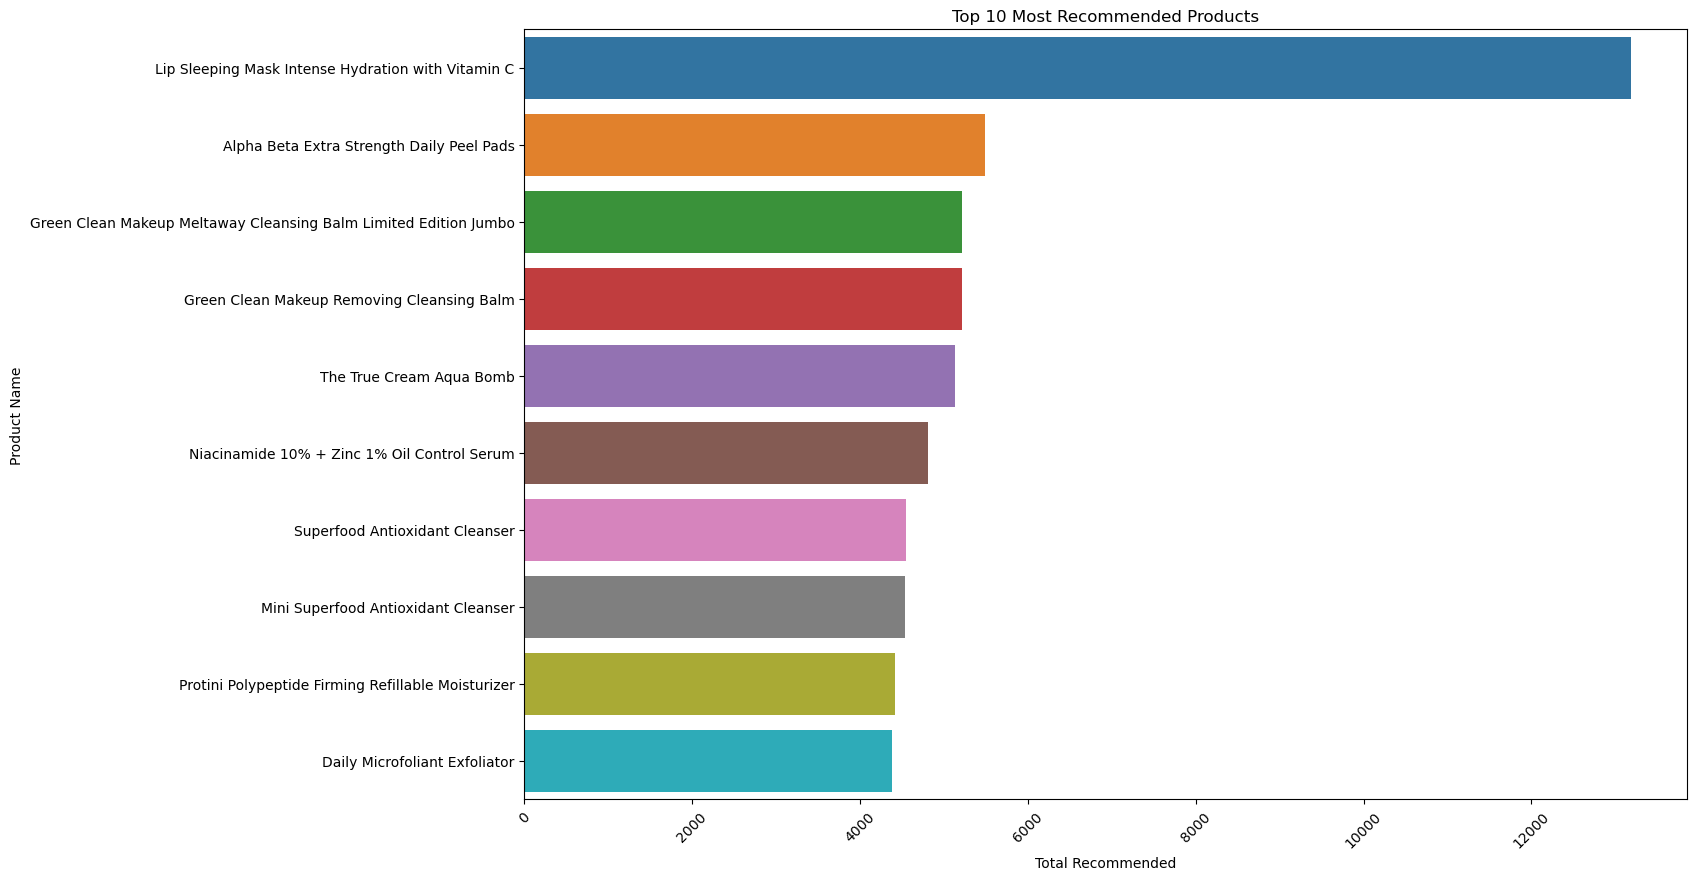

In [45]:
plt.figure(figsize=(15, 10))
most_recommended = reviews.groupby(['product_id', 'product_name', 'brand_name']).sum(numeric_only=True)['is_recommended'].reset_index() \
    .sort_values('is_recommended', ascending=False).head(10)

sns.barplot(data=most_recommended, x='is_recommended', y='product_name')
plt.title("Top 10 Most Recommended Products")
plt.xlabel("Total Recommended")
plt.ylabel("Product Name")
plt.xticks(rotation=45)
plt.show()

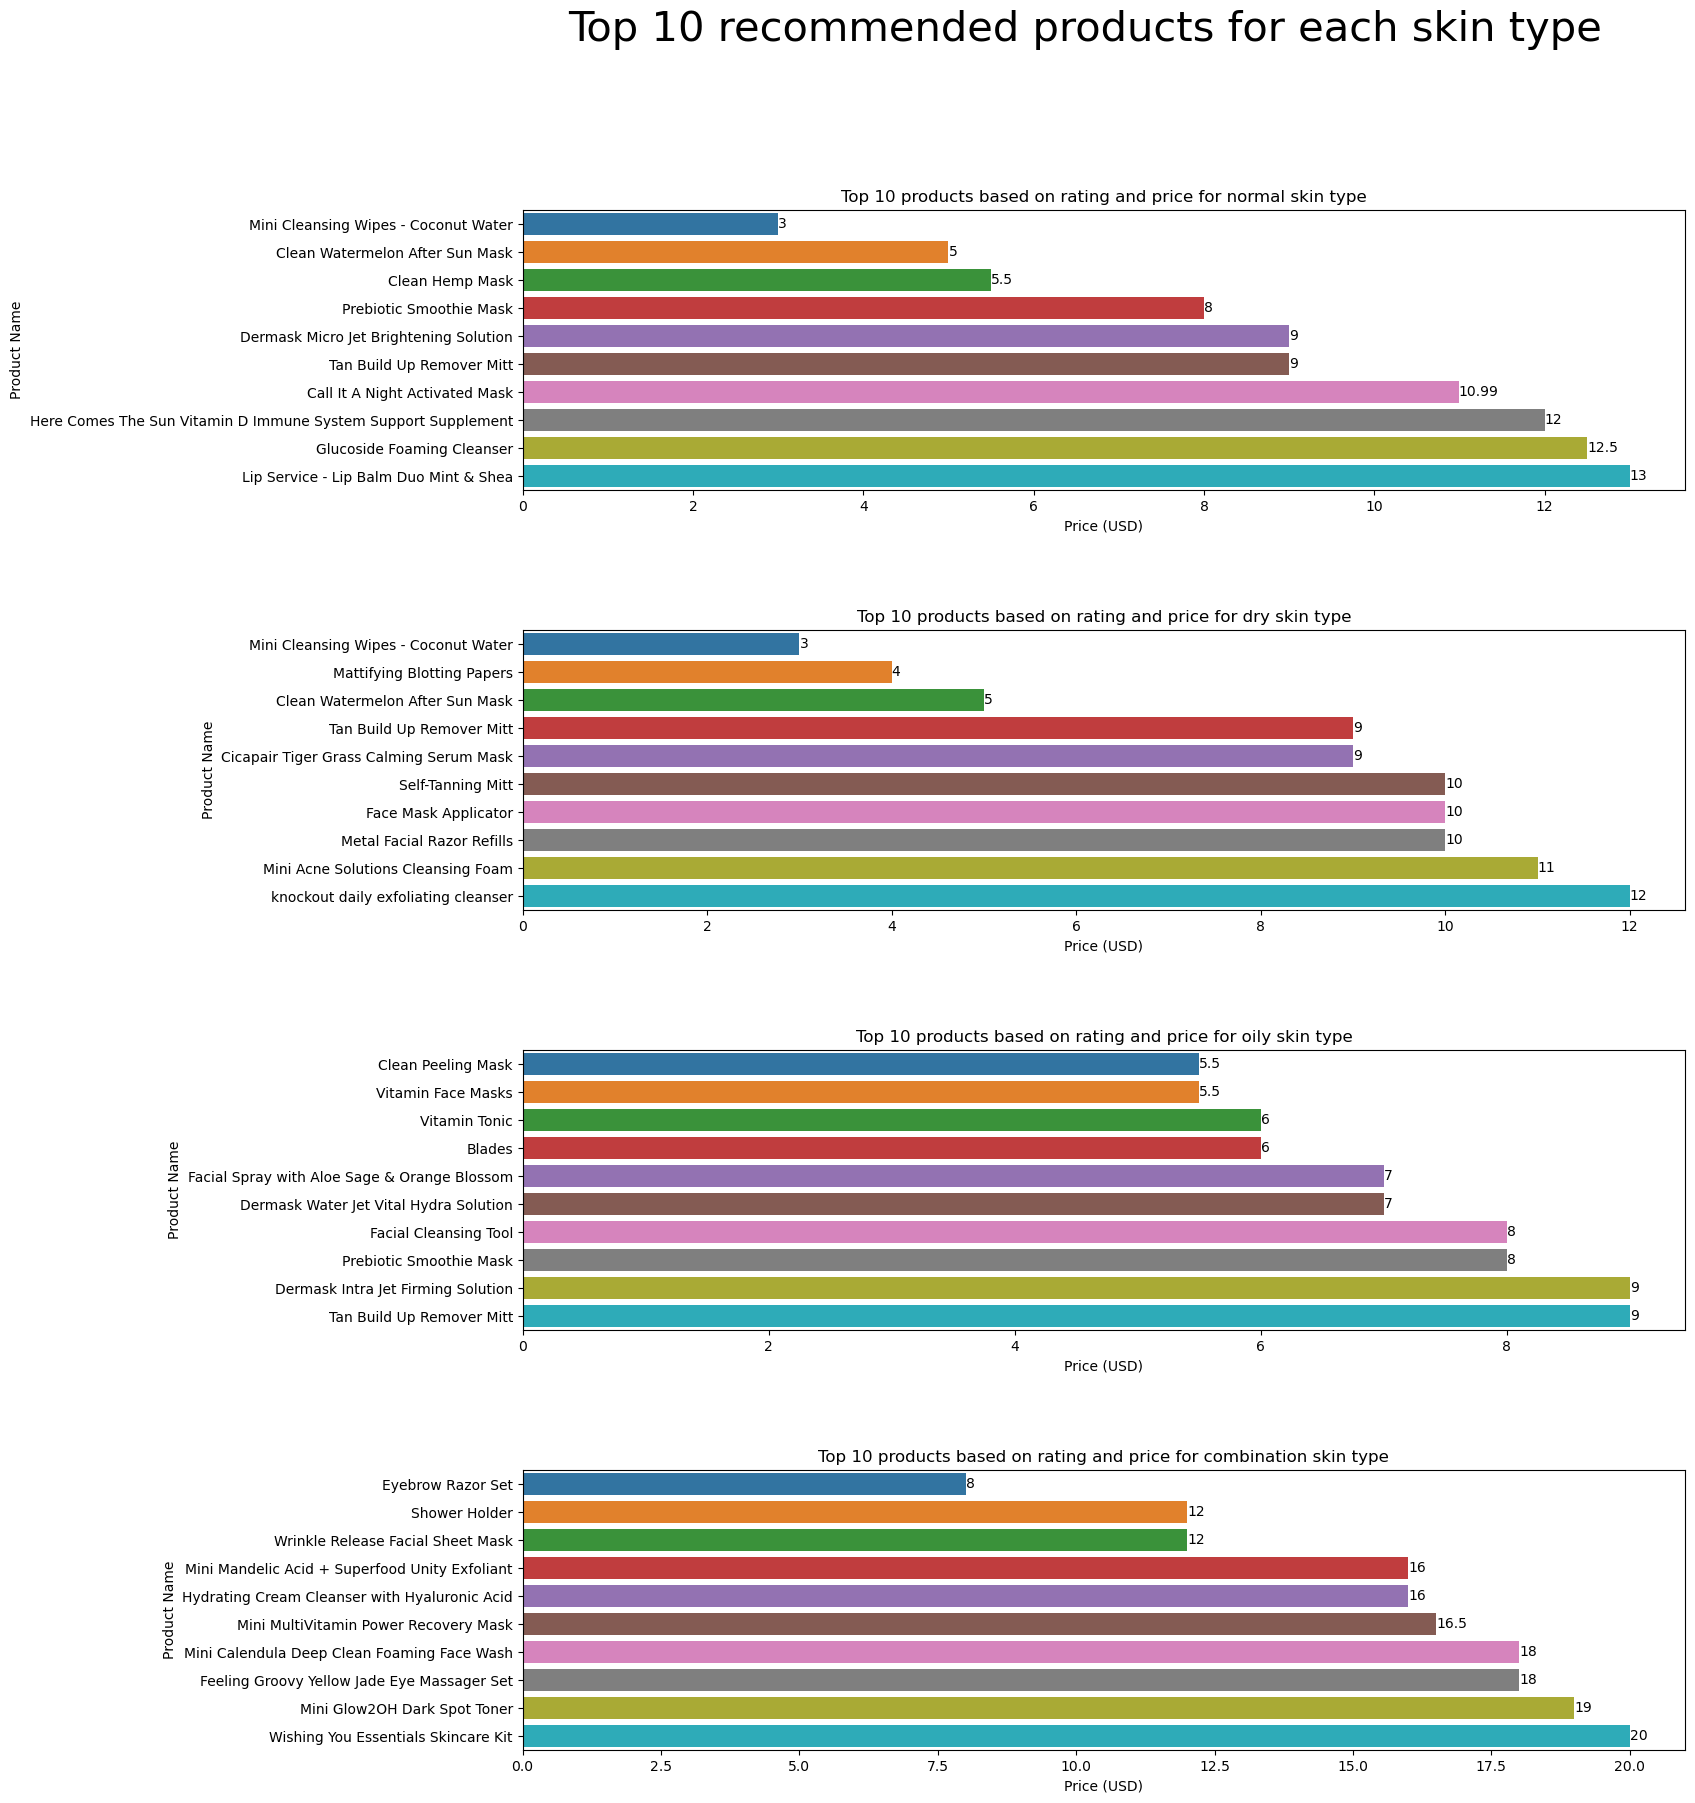

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

skin_types = ['normal', 'dry', 'oily', 'combination']
product_skin = reviews.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

for i, skin_type in enumerate(skin_types):
    ax = axes[i]
    skin_type_products = product_skin[product_skin['skin_type'] == skin_type].sort_values(['rating', 'price_usd'], ascending=[False, True]).head(10)
    sns.barplot(data=skin_type_products, x='price_usd', y='product_name', ax=ax)
    ax.set_title(f"Top 10 products based on rating and price for {skin_type} skin type")
    ax.set_xlabel("Price (USD)")
    ax.set_ylabel("Product Name")
    ax.bar_label(ax.containers[0])  # Add number labels to the bars

fig.suptitle("Top 10 recommended products for each skin type", fontsize=30)
plt.show()


In [47]:
products_per_customer = reviews.groupby('author_id')['product_id'].nunique()
products_per_customer

author_id
538863             1
549704             1
557770             1
561736             2
562130             2
                  ..
orderGen51156      7
orderGen53499      1
orderGen5563740    4
orderGen703225     1
orderGen899861     1
Name: product_id, Length: 578653, dtype: int64

In [48]:
products_per_customer_sorted = products_per_customer.sort_values(ascending=False)
products_per_customer_sorted

author_id
1696370280        234
1288462295        166
5060164185        131
2330399812        131
7375781965        129
                 ... 
1387565392          1
1387551816          1
1387549634          1
1387464513          1
orderGen899861      1
Name: product_id, Length: 578653, dtype: int64

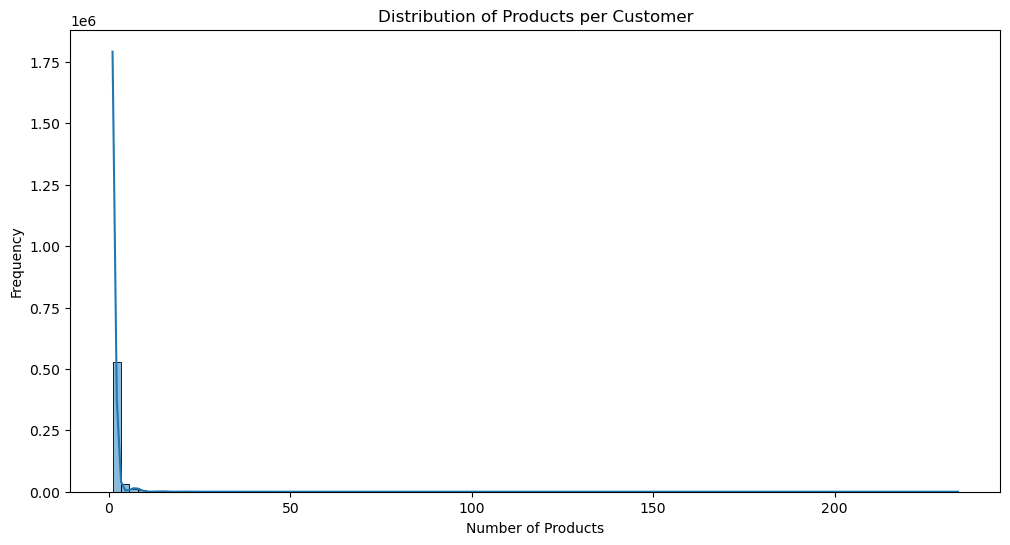

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=products_per_customer, bins=100, kde=True)
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Products per Customer')
plt.show()

In [50]:
# Merge the product_id column from reviews dataset with product dataset
merged_df = reviews.merge(product_info[['product_id', 'product_name', 'price_usd']], on='product_id', how='left')
merged_df
# Count the occurrences of each product_name
product_counts = merged_df['product_name_x'].value_counts()
product_counts
# Sort the product_counts Series
product_counts_sorted = product_counts.sort_values(ascending=False)
product_counts_sorted
# Retrieve the product_name and price_usd for the products in product_counts_sorted
product_info_filtered = merged_df.loc[merged_df['product_name_x'].isin(product_counts_sorted.index), ['product_name_x', 'price_usd_x']]
product_info_filtered

product_name_x  price_usd_x
0                           Gentle Hydra-Gel Face Cleanser         19.0
1        Lip Sleeping Mask Intense Hydration with Vitam...         24.0
2        Lip Sleeping Mask Intense Hydration with Vitam...         24.0
3        Lip Sleeping Mask Intense Hydration with Vitam...         24.0
4        Lip Sleeping Mask Intense Hydration with Vitam...         24.0
...                                                    ...          ...
1301131  Multi Action Clear Acne Clearing Treatment Lot...         49.0
1301132  Multi Action Clear Acne Clearing Treatment Lot...         49.0
1301133  Multi Action Clear Acne Clearing Treatment Lot...         49.0
1301134  Multi Action Clear Acne Clearing Treatment Lot...         49.0
1301135  Multi Action Clear Acne Clearing Treatment Lot...         49.0

[1301136 rows x 2 columns]

In [51]:
# Remove duplicates from product_info_filtered
product_info_filtered_unique = product_info_filtered.drop_duplicates(subset=['product_name_x'])

# Sort product_info_filtered_unique according to price_usd
product_info_filtered_sorted = product_info_filtered_unique.sort_values('price_usd_x')
product_info_filtered_sorted

product_name_x  price_usd_x
1228379                          Clean Charcoal Nose Strip          3.0
173436                       Cleansing & Exfoliating Wipes          3.0
1299784               Mini Cleansing Wipes - Coconut Water          3.0
1132967                                     Clean Eye Mask          3.5
1292858                                  Vitamin Eye Masks          3.5
...                                                    ...          ...
1298917  Trinity Facial Toning Device + Wrinkle Reducer...        449.0
1268046           Touch Home Permanent Hair Removal Device        449.0
1265995   Trinity + Eye and Lip Enhancer Attachment Bundle        449.0
1300741                       DRx SpectraLite BodyWare Pro        465.0
1300770          Shani Darden by Déesse PRO LED Light Mask       1900.0

[2334 rows x 2 columns]

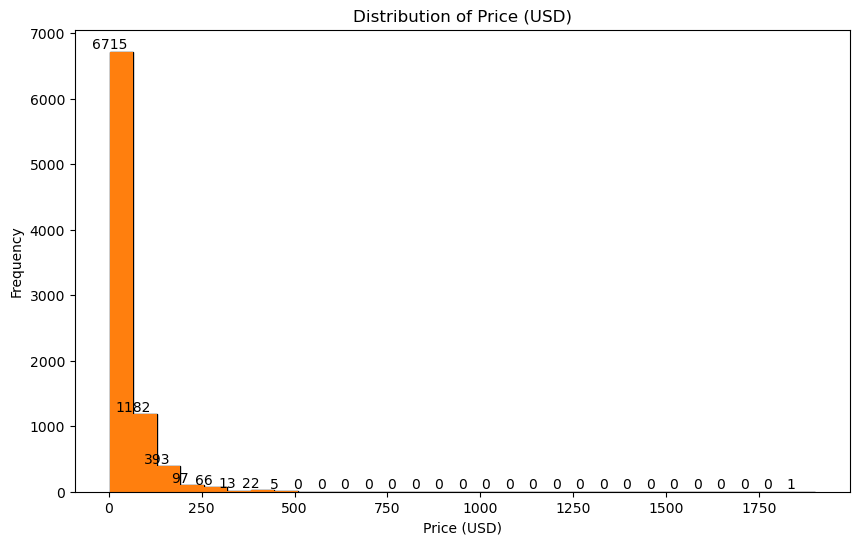

In [52]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(product_info['price_usd'], bins=30, edgecolor='black')

# Set the axis labels and title
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Price (USD)')

# Get the counts for each bin
counts, bins, _ = plt.hist(product_info['price_usd'], bins=30)

# Add the count numbers above each bar
for count, x, y in zip(counts, bins[:-1], counts):
    plt.text(x, y, int(count), ha='center', va='bottom')

# Show the plot
plt.show()


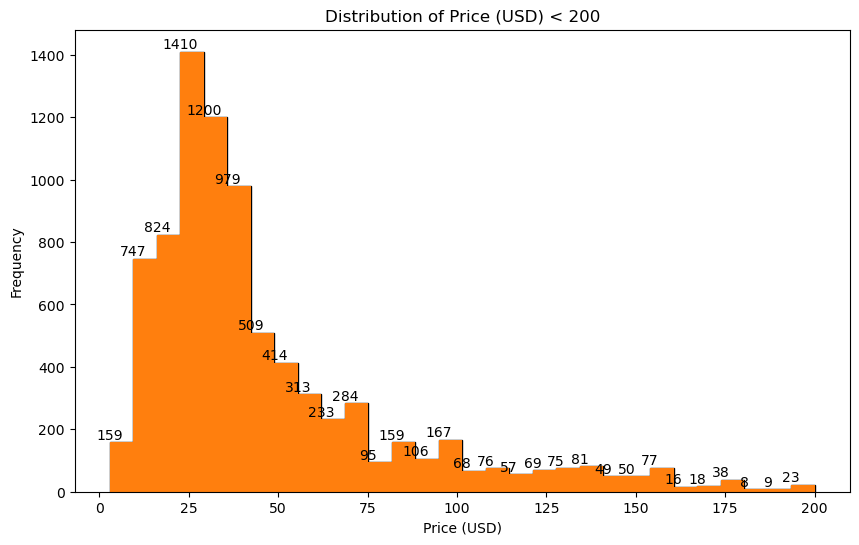

In [53]:
import matplotlib.pyplot as plt

# Filter the data for prices less than 200
filtered_prices = product_info['price_usd'][product_info['price_usd'] < 200]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(filtered_prices, bins=30, edgecolor='black')

# Set the axis labels and title
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Price (USD) < 200')

# Get the counts for each bin
counts, bins, _ = plt.hist(filtered_prices, bins=30)

# Add the count numbers above each bar
for count, x, y in zip(counts, bins[:-1], counts):
    plt.text(x, y, int(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [54]:
# Retrieve elements less than 10 from product_counts_sorted
less_than_1000 = product_counts_sorted[product_counts_sorted < 1000]
less_than_1000

Urban Environment Vita-Clear Sunscreen SPF 42          600
Omega Water Cream Moisturizer                          600
Focuspot Micro Tip Patches                             579
Banana Bright+ Vitamin C Eye Crème                     579
Daily Dose Vitamin C + SPF 40 Sunscreen Serum PA+++    574
                                                      ... 
SuperPower Immune Support Supplement                     1
Soft Clean Moisture Rich Foaming Cleanser                1
Plump Pout Duo                                           1
Equilibrium Biomimetic Skin Active Serum                 1
Gentle Hydra-Gel Face Cleanser                           1
Name: product_name_x, Length: 1836, dtype: int64

In [55]:
# Calculate the threshold for the bottom 30%
threshold = product_counts_sorted.quantile(0.3)

# Retrieve the elements below the threshold
bottom_30_percent = product_counts_sorted[product_counts_sorted < threshold]
bottom_30_percent

Mini Lemonade Smoothing Scrub                                52
Classic Body Organic Sunscreen Spray SPF 70 Peach Blossom    52
So Poreless Deep Exfoliating Blackhead Scrub                 52
Hyaluronic Acid + Peptide Lip Treatment Booster              52
Mini Cream Skin Toner & Moisturizer                          52
                                                             ..
SuperPower Immune Support Supplement                          1
Soft Clean Moisture Rich Foaming Cleanser                     1
Plump Pout Duo                                                1
Equilibrium Biomimetic Skin Active Serum                      1
Gentle Hydra-Gel Face Cleanser                                1
Name: product_name_x, Length: 699, dtype: int64

C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\2790758951.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


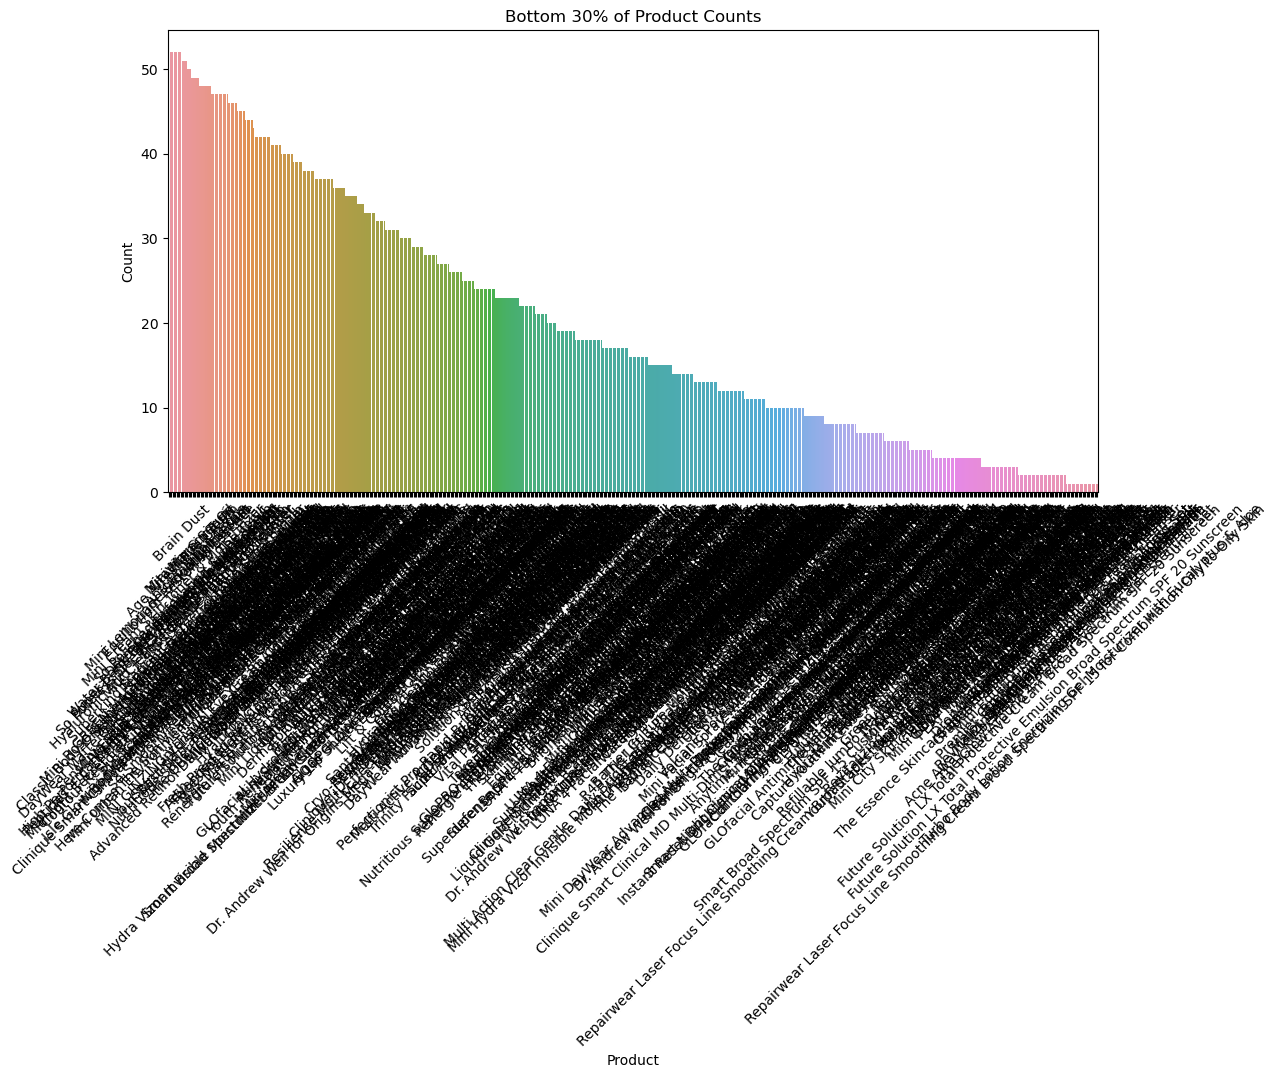

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the threshold for the bottom 30%
threshold = product_counts_sorted.quantile(0.3)

# Retrieve the elements below the threshold
bottom_30_percent = product_counts_sorted[product_counts_sorted < threshold]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_30_percent.index, y=bottom_30_percent.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Bottom 30% of Product Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ivy\AppData\Local\Temp\ipykernel_2608\3677880624.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


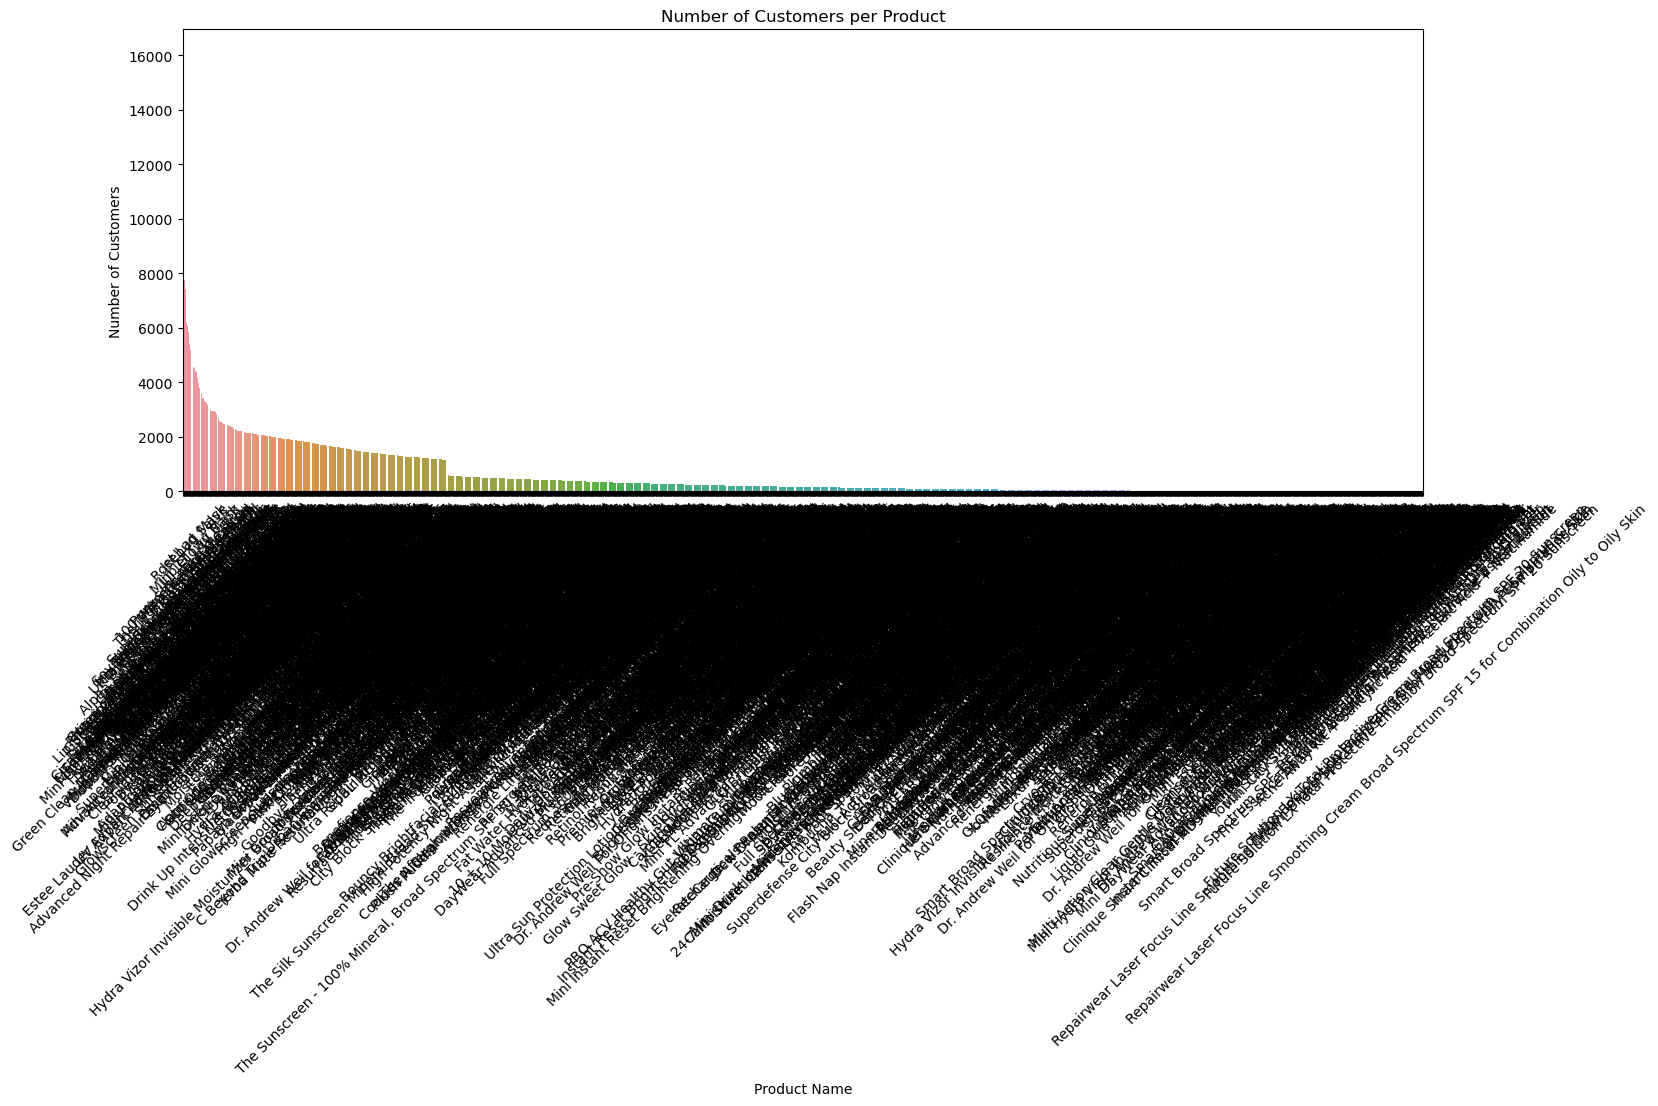

In [57]:
# Create the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=product_counts_sorted.index, y=product_counts_sorted.values)
plt.xlabel('Product Name')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Count the occurrences of each product_id
product_counts = reviews['product_id'].value_counts()

# Print the number of customers who bought each product
print(product_counts)


P420652    16138
P7880       8736
P218700     7763
P248407     7547
P269122     7414
           ...  
P501153        1
P504424        1
P480445        1
P501886        1
P504322        1
Name: product_id, Length: 2351, dtype: int64


In [59]:
# unique products
print(f"There are {reviews['product_id'].nunique()} unique products.")

There are 2351 unique products.


In [60]:
#unique customers
print(f"There are {reviews['author_id'].nunique()} unique customers.")

There are 578653 unique customers.


In [61]:
# how many items each cusotmer buy
items_per_customer = reviews.groupby('author_id')['product_id'].nunique()
items_per_customer

author_id
538863             1
549704             1
557770             1
561736             2
562130             2
                  ..
orderGen51156      7
orderGen53499      1
orderGen5563740    4
orderGen703225     1
orderGen899861     1
Name: product_id, Length: 578653, dtype: int64

In [62]:
# Product_id bought count

# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_id')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'product_id': counts.index, 'Count': counts.values})

# Sort the DataFrame by count in descending order
sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)

# Display the counts in a table
sorted_counts_df

product_id  Count
387     P420652  15853
2344      P7880   8544
42      P218700   7461
54      P248407   7385
60      P269122   7378
...         ...    ...
2098    P501886      1
1703    P478260      1
2299    P504882      1
1993    P500155      1
1924    P483086      1

[2351 rows x 2 columns]

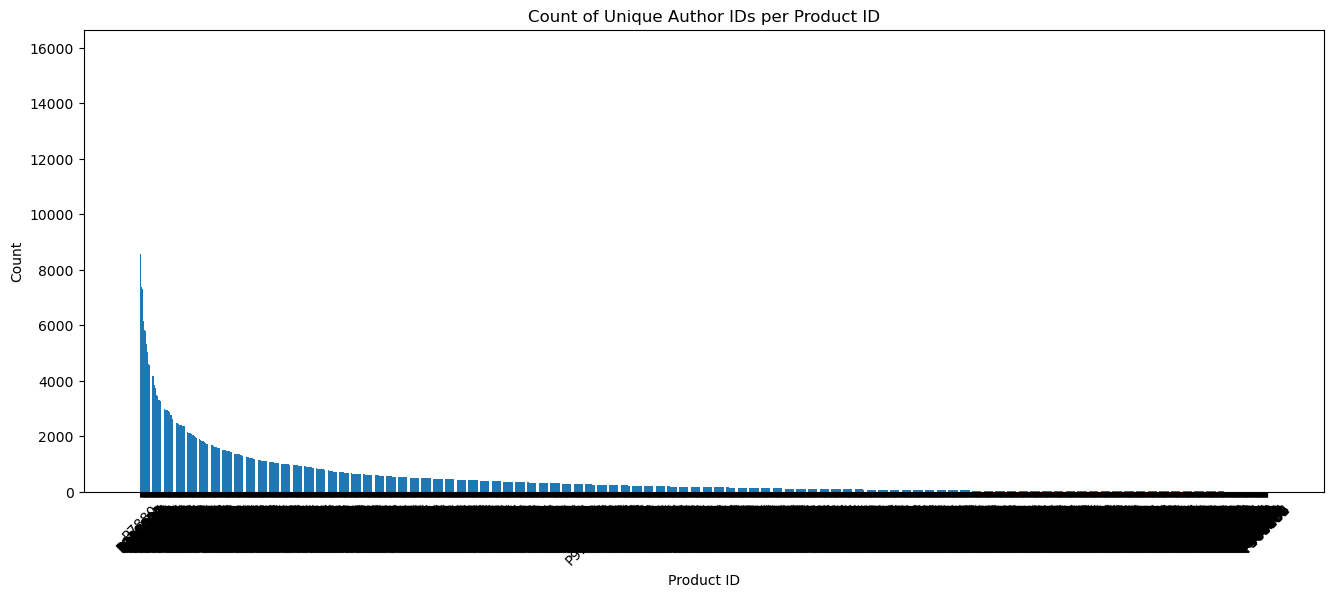

In [63]:
import matplotlib.pyplot as plt

# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_id')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(16, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Count of Unique Author IDs per Product ID')
plt.xticks(rotation=45)
plt.show()


In [64]:
# products being bought more than 1000 times
sorted_counts_df = sorted_counts_df[sorted_counts_df['Count'] > 1000]
sorted_counts_df

product_id  Count
387     P420652  15853
2344      P7880   8544
42      P218700   7461
54      P248407   7385
60      P269122   7378
...         ...    ...
848     P447210   1013
28      P188309   1012
1050    P455927   1011
1049    P455926   1011
248     P403817   1006

[297 rows x 2 columns]

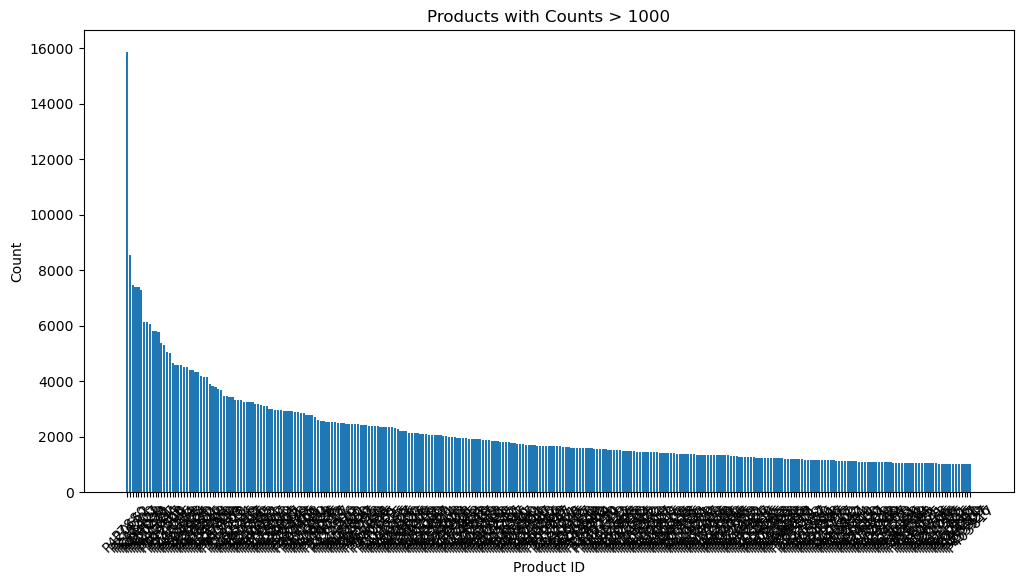

In [65]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_counts_df['product_id'], sorted_counts_df['Count'])
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Products with Counts > 1000')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Top 20 Products
# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_name')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

# Select the top 20 products with highest counts
# top_20_products = sorted_counts.head(20)
# top_20_products_df = top_20_products.rename(columns={'product_id': 'quantities_sold'})
# top_20_products_df

sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)
top_20_products = sorted_counts_df.head(20)
top_20_products_df = top_20_products.rename(columns={'Count': 'quantities_sold'})
top_20_products_df = top_20_products_df.reset_index(drop=True)
top_20_products_df

product_id  quantities_sold
0     P420652            15853
1       P7880             8544
2     P218700             7461
3     P248407             7385
4     P269122             7378
5     P394639             7287
6     P417238             6148
7     P450271             6148
8     P427421             6056
9     P411387             5810
10    P441644             5803
11    P427417             5788
12    P309308             5385
13    P411540             5302
14     P42204             5047
15    P471546             5018
16    P248404             4660
17    P443352             4582
18    P423688             4582
19    P421275             4569